## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Objective & Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Dictionary 
0. ID
1. MSSubClass: Identifies the type of dwelling involved in the sale.
2. MSZoning: Identifies the general zoning classification of the sale.
3. LotFrontage: Linear feet of street connected to property.
4. LotArea: Lot size in square feet.
5. Street: Type of road access to property.
6. Alley: Type of alley access to property.
7. LotShape: General shape of property.
8. LandContour: Flatness of the property.
9. Utilities: Type of utilities available.
10. LotConfig: Lot configuration.
11. LandSlope: Slope of property.
12. Neighborhood: Physical locations within Ames city limits.
13. Condition1: Proximity to various conditions.
14. Condition2: Proximity to various conditions (if more than one is present)
15. BldgType: Type of dwelling.
16. HouseStyle: Style of dwelling.
17. OverallQual: Rates the overall material and finish of the house
18. OverallCond: Rates the overall condition of the house
19. YearBuilt: Original construction date
20. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
21. RoofStyle: Type of roof
22. RoofMatl: Roof material
23. Exterior1st: Exterior covering on house
24. Exterior2nd: Exterior covering on house (if more than one material)
25. MasVnrType: Masonry veneer type
26. MasVnrArea: Masonry veneer area in square feet
27. ExterQual: Evaluates the quality of the material on the exterior 
28. ExterCond: Evaluates the present condition of the material on the exterior
29. Foundation: Type of foundation
30. BsmtQual: Evaluates the height of the basement
31. BsmtCond: Evaluates the general condition of the basement
32. BsmtExposure: Refers to walkout or garden level walls
33. BsmtFinType1: Rating of basement finished area
34. BsmtFinSF1: Type 1 finished square feet
35. BsmtFinType2: Rating of basement finished area (if multiple types)
36. BsmtFinSF2: Type 2 finished square feet
37. BsmtUnfSF: Unfinished square feet of basement area
38. TotalBsmtSF: Total square feet of basement area
39. Heating: Type of heating
40. HeatingQC: Heating quality and condition
41. CentralAir: Central air conditioning
42. Electrical: Electrical system
43. 1stFlrSF: First Floor square feet
44. 2ndFlrSF: Second floor square feet
45. LowQualFinSF: Low quality finished square feet (all floors)
46. GrLivArea: Above grade (ground) living area square feet
47. BsmtFullBath: Basement full bathrooms
48. BsmtHalfBath: Basement half bathrooms
49. FullBath: Full bathrooms above grade
50. HalfBath: Half baths above grade
51. Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
52. Kitchen: Kitchens above grade
53. KitchenQual: Kitchen quality
54. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
55. Functional: Home functionality (Assume typical unless deductions are warranted)
56. Fireplaces: Number of fireplaces
57. FireplaceQu: Fireplace quality
58. GarageType: Garage location
59. GarageYrBlt: Year garage was built
60. GarageFinish: Interior finish of the garage
61. GarageCars: Size of garage in car capacity
62. GarageArea: Size of garage in square feet
63. GarageQual: Garage quality
64. GarageCond: Garage condition
65. PavedDrive: Paved driveway
66. WoodDeckSF: Wood deck area in square feet
67. OpenPorchSF: Open porch area in square feet
68. EnclosedPorch: Enclosed porch area in square feet
69. 3SsnPorch: Three season porch area in square feet
70. ScreenPorch: Screen porch area in square feet
71. PoolArea: Pool area in square feet
72. PoolQC: Pool quality
73. Fence: Fence quality
74. MiscFeature: Miscellaneous feature not covered in other categories
75. MiscVal: $Value of miscellaneous feature
76. MoSold: Month Sold (MM)
77. YrSold: Year Sold (YYYY)
78. SaleType: Type of sale
79. SaleCondition: Condition of sale
80. SalePrice

## Necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from datetime import date

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
#pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


from matplotlib import pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures, scale

### Import & Overview of the Data

In [2]:
houses = pd.read_csv('train.csv')
print(f'There are {houses.shape[0]} rows and {houses.shape[1]} columns.')

houses.head()

There are 1460 rows and 81 columns.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Observations :
   * The dataset contain 1460 rows and 81 columns.

In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Observations:
    * Object data need to be converted to categorical.
    * Many missing values observed on this dataset.

In [4]:
## lets convert the object type to categorical

object_cols = houses.select_dtypes(include=np.object).columns.tolist()
houses[object_cols] = houses[object_cols].astype("category")
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

- Observations:
    * Many missing data observed, we will analyse that next.

## Data Cleaning

In [5]:
## lets check the unique values of every variale on the dataset:
dict(houses.nunique())

{'Id': 1460,
 'MSSubClass': 15,
 'MSZoning': 5,
 'LotFrontage': 110,
 'LotArea': 1073,
 'Street': 2,
 'Alley': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 112,
 'YearRemodAdd': 61,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 4,
 'MasVnrArea': 327,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinSF1': 637,
 'BsmtFinType2': 6,
 'BsmtFinSF2': 144,
 'BsmtUnfSF': 780,
 'TotalBsmtSF': 721,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 '1stFlrSF': 753,
 '2ndFlrSF': 417,
 'LowQualFinSF': 24,
 'GrLivArea': 861,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'KitchenQual': 4,
 'TotRmsAbvGrd': 12,

- Observations:
    * ID column need to be dropped since it's a variable that represents each house as unique number

In [6]:
## Let's frop the ID columns since it's a unique number and will add no value to the modeling phase:
houses = houses.drop(['Id'], axis=1)

In [7]:
## Check for missing values
missing_recap = houses.isnull().sum().sort_values(ascending=False)/houses.shape[0]*100
dict(missing_recap)

{'PoolQC': 99.52054794520548,
 'MiscFeature': 96.30136986301369,
 'Alley': 93.76712328767123,
 'Fence': 80.75342465753424,
 'FireplaceQu': 47.26027397260274,
 'LotFrontage': 17.73972602739726,
 'GarageYrBlt': 5.5479452054794525,
 'GarageCond': 5.5479452054794525,
 'GarageType': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtCond': 2.5342465753424657,
 'BsmtQual': 2.5342465753424657,
 'BsmtFinType1': 2.5342465753424657,
 'MasVnrArea': 0.547945205479452,
 'MasVnrType': 0.547945205479452,
 'Electrical': 0.0684931506849315,
 'MSSubClass': 0.0,
 'Fireplaces': 0.0,
 'Functional': 0.0,
 'KitchenQual': 0.0,
 'KitchenAbvGr': 0.0,
 'BedroomAbvGr': 0.0,
 'HalfBath': 0.0,
 'FullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'TotRmsAbvGrd': 0.0,
 'GarageCars': 0.0,
 'GrLivArea': 0.0,
 'GarageArea': 0.0,
 'PavedDrive': 0.0,
 'WoodDeckSF': 0.0,
 'OpenPorchSF': 0.0,
 'EnclosedPorch': 0.0,
 

- Observations:
    * [PoolQC, MiscFeature, Alley, Fence, FireplaceQu] are more than 20% missing data which need to be eliminated

In [8]:
## emilinate the columns with high missing percentage:
houses = houses.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

In [9]:
## Checking again for missing values:
missing_recap = houses.isnull().sum().sort_values(ascending=False)/houses.shape[0]*100
dict(missing_recap)

{'LotFrontage': 17.73972602739726,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtExposure': 2.6027397260273974,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtFinType1': 2.5342465753424657,
 'MasVnrArea': 0.547945205479452,
 'MasVnrType': 0.547945205479452,
 'Electrical': 0.0684931506849315,
 'KitchenAbvGr': 0.0,
 'BedroomAbvGr': 0.0,
 'HalfBath': 0.0,
 'FullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'BsmtFullBath': 0.0,
 'KitchenQual': 0.0,
 'GrLivArea': 0.0,
 'TotRmsAbvGrd': 0.0,
 'Functional': 0.0,
 'MSSubClass': 0.0,
 'Fireplaces': 0.0,
 'ScreenPorch': 0.0,
 'SaleCondition': 0.0,
 'SaleType': 0.0,
 'YrSold': 0.0,
 'MoSold': 0.0,
 'MiscVal': 0.0,
 'PoolArea': 0.0,
 '3SsnPorch': 0.0,
 '2ndFlrSF': 0.0,
 'EnclosedPorch': 0.0,
 'OpenPorchSF': 0.0,
 'WoodDeckSF': 0.0,
 'PavedDrive': 0.0,
 'GarageAre

- Observations:
    * [LotFrontage, GarageType, GarageCond, GarageYrBlt, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, MasVnrArea, MasVnrType, Electrical] need to be imputed.

In [10]:
# imputing the missing values using the mean of LotArea groups
col_to_impute = ['LotFrontage', 'GarageType', 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
                 'Electrical']

for col in col_to_impute:
    print(f'Column {col} is : {houses[col].dtype}')
    if houses[col].dtype == np.number:
        houses.loc[houses[col].isnull(), col] = houses.groupby('LotArea').fillna(houses.groupby('LotArea')[col].mean(), inplace=True)
        
houses = houses.apply(lambda x: x.fillna(x.value_counts().index[0]))

Column LotFrontage is : float64
Column GarageType is : category
Column GarageCond is : category
Column GarageYrBlt is : float64
Column GarageFinish is : category
Column GarageQual is : category
Column BsmtFinType2 is : category
Column BsmtExposure is : category
Column BsmtFinType1 is : category
Column BsmtCond is : category
Column BsmtQual is : category
Column MasVnrArea is : float64
Column MasVnrType is : category
Column Electrical is : category


In [11]:
## Confirm the missing values:
missing_recap = houses.isnull().sum().sort_values(ascending=False)/houses.shape[0]*100
dict(missing_recap)

{'MSSubClass': 0.0,
 'GarageYrBlt': 0.0,
 'Fireplaces': 0.0,
 'Functional': 0.0,
 'TotRmsAbvGrd': 0.0,
 'KitchenQual': 0.0,
 'KitchenAbvGr': 0.0,
 'BedroomAbvGr': 0.0,
 'HalfBath': 0.0,
 'FullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'BsmtFullBath': 0.0,
 'GrLivArea': 0.0,
 'LowQualFinSF': 0.0,
 '2ndFlrSF': 0.0,
 '1stFlrSF': 0.0,
 'Electrical': 0.0,
 'GarageType': 0.0,
 'GarageFinish': 0.0,
 'HeatingQC': 0.0,
 'GarageCars': 0.0,
 'SaleCondition': 0.0,
 'SaleType': 0.0,
 'YrSold': 0.0,
 'MoSold': 0.0,
 'MiscVal': 0.0,
 'PoolArea': 0.0,
 'ScreenPorch': 0.0,
 '3SsnPorch': 0.0,
 'EnclosedPorch': 0.0,
 'OpenPorchSF': 0.0,
 'WoodDeckSF': 0.0,
 'PavedDrive': 0.0,
 'GarageCond': 0.0,
 'GarageQual': 0.0,
 'GarageArea': 0.0,
 'CentralAir': 0.0,
 'Heating': 0.0,
 'MSZoning': 0.0,
 'YearRemodAdd': 0.0,
 'OverallCond': 0.0,
 'OverallQual': 0.0,
 'HouseStyle': 0.0,
 'BldgType': 0.0,
 'Condition2': 0.0,
 'Condition1': 0.0,
 'Neighborhood': 0.0,
 'LandSlope': 0.0,
 'LotConfig': 0.0,
 'Utilities': 0.0,
 'Land

- Observations:
    * No missing value on our dataset (imputed).

## EDA

In [12]:
numeric_columns = houses.select_dtypes(include=np.number).columns.tolist()
cat_columns = houses.select_dtypes(include='category').columns.tolist()

### Data Visualization

#### Univariate Analysis

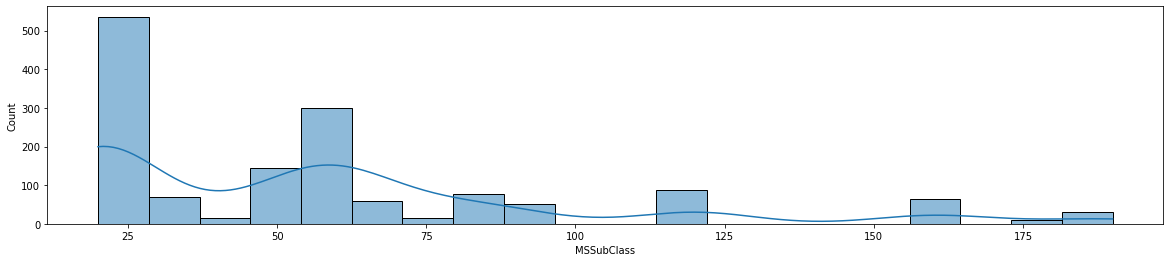

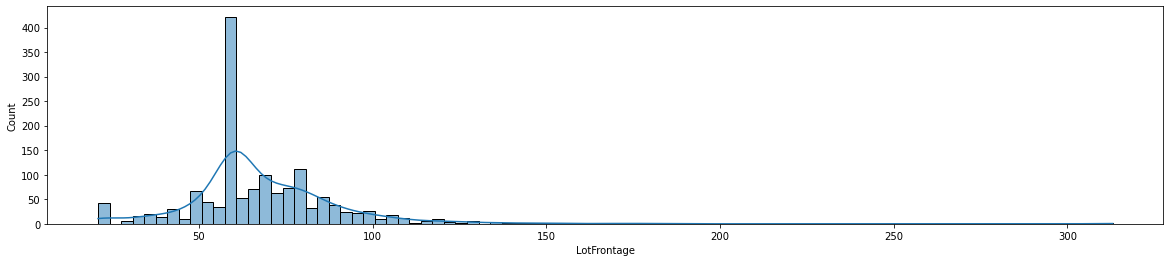

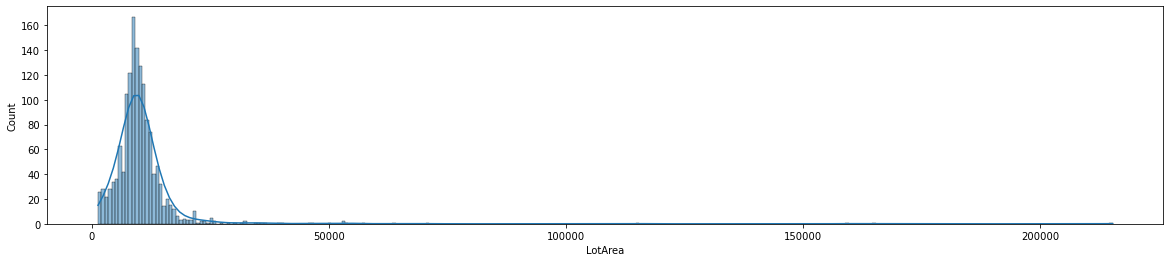

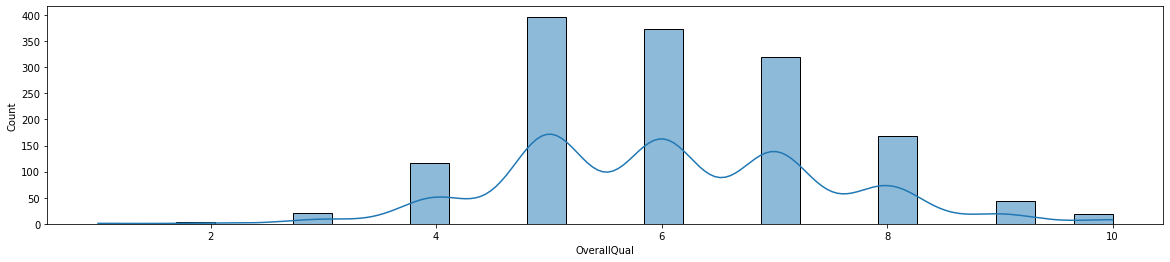

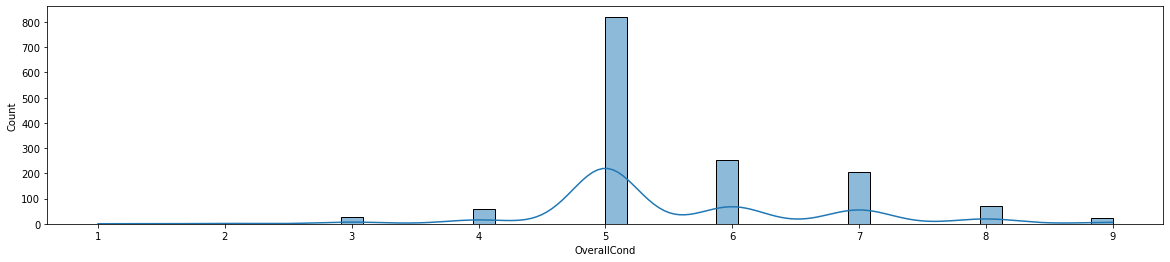

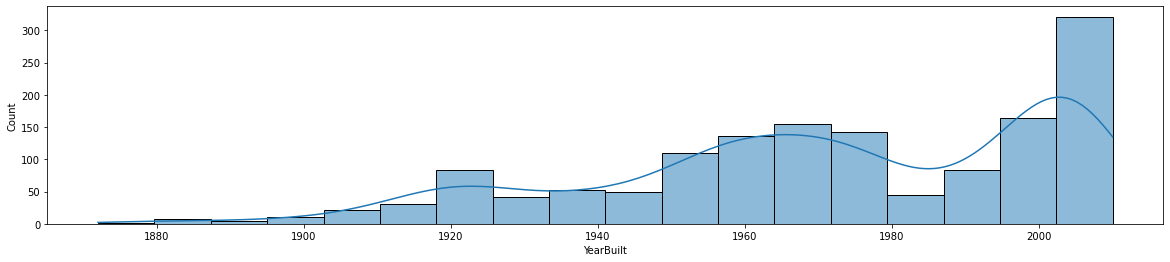

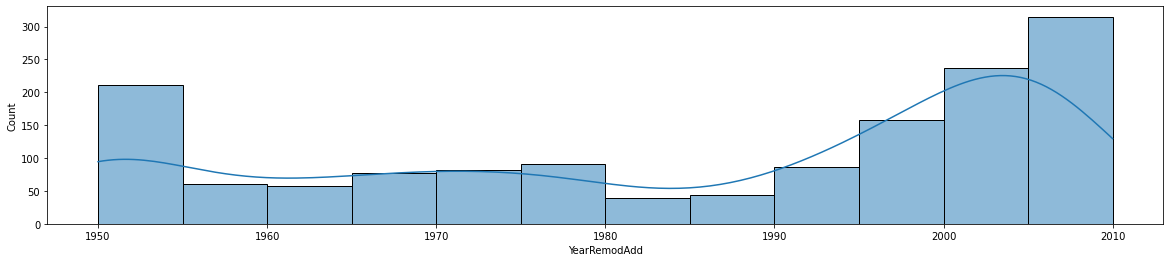

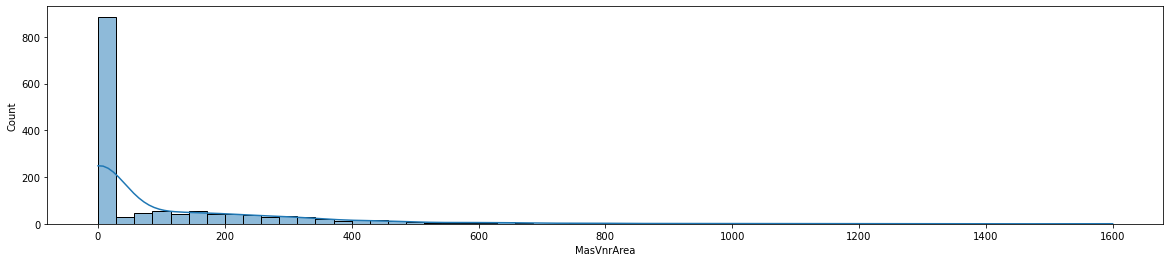

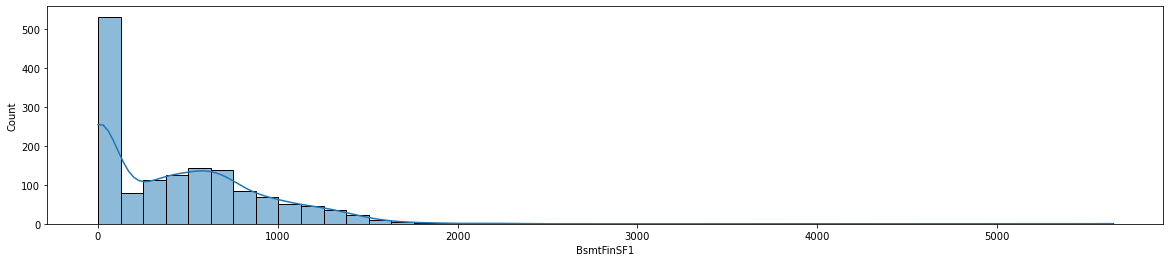

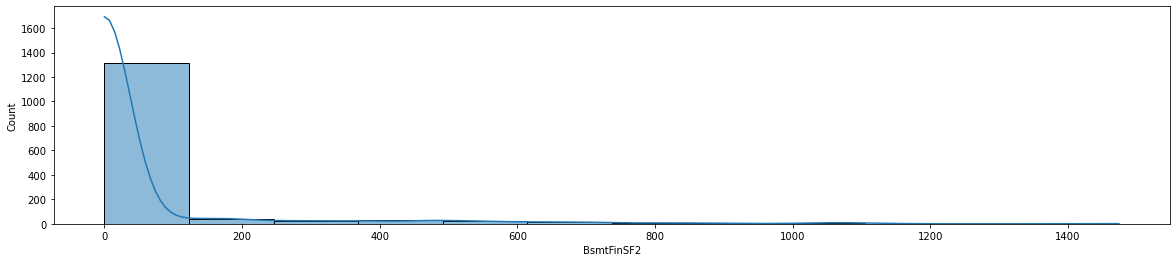

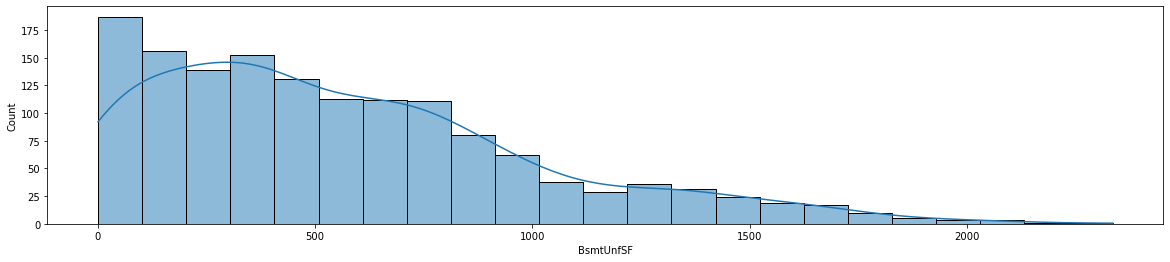

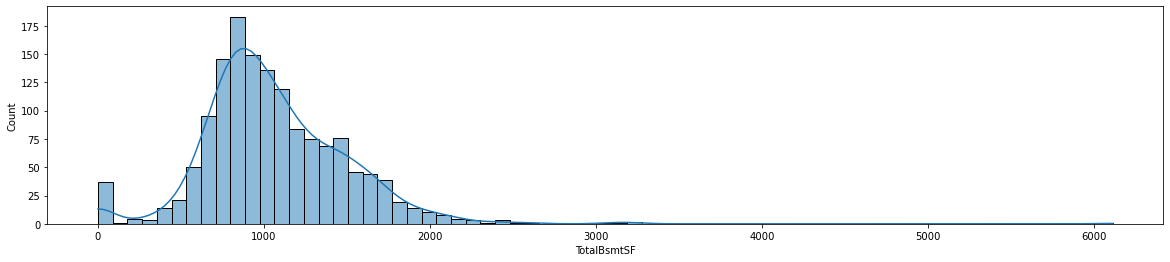

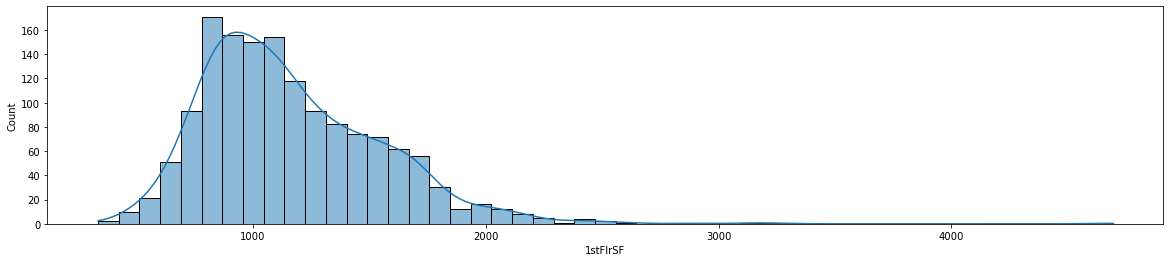

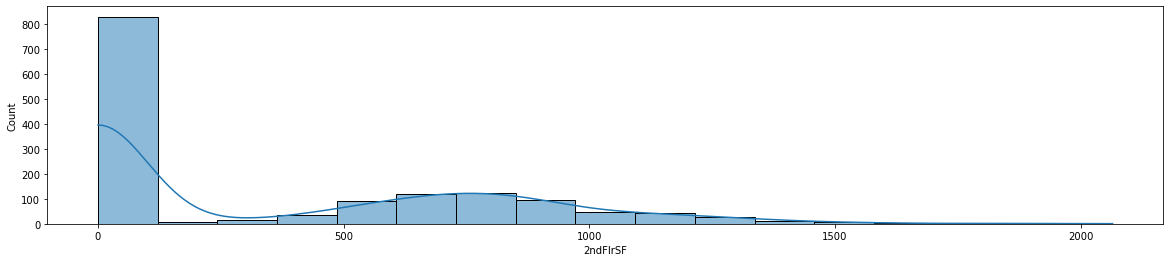

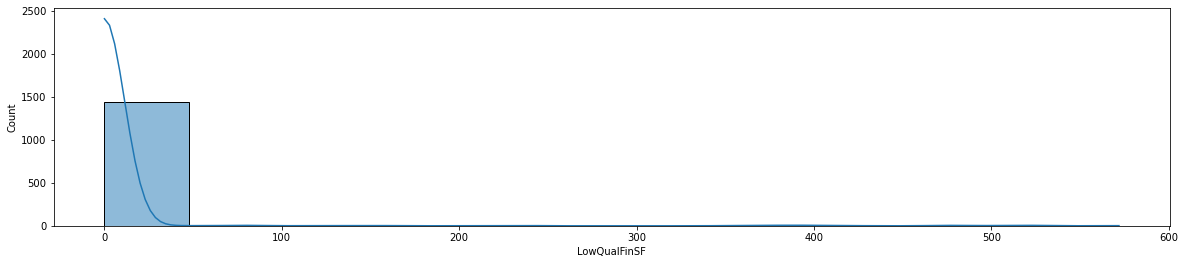

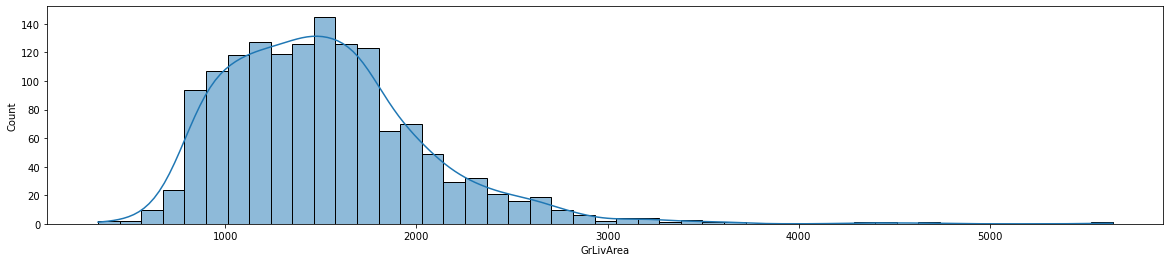

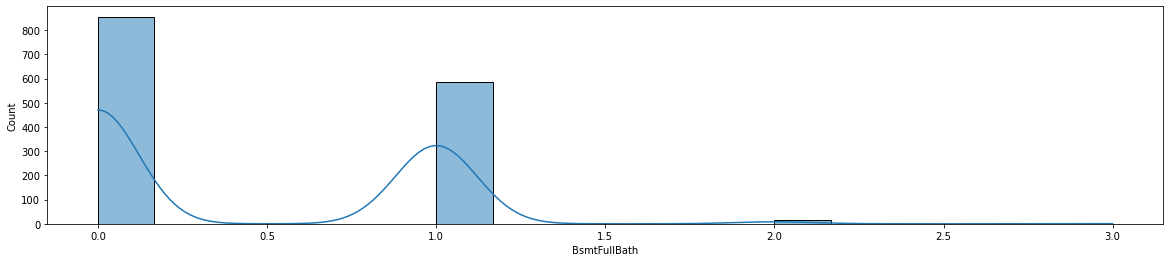

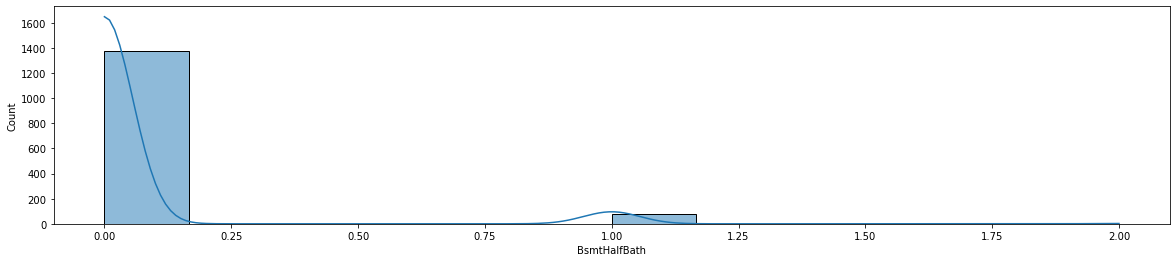

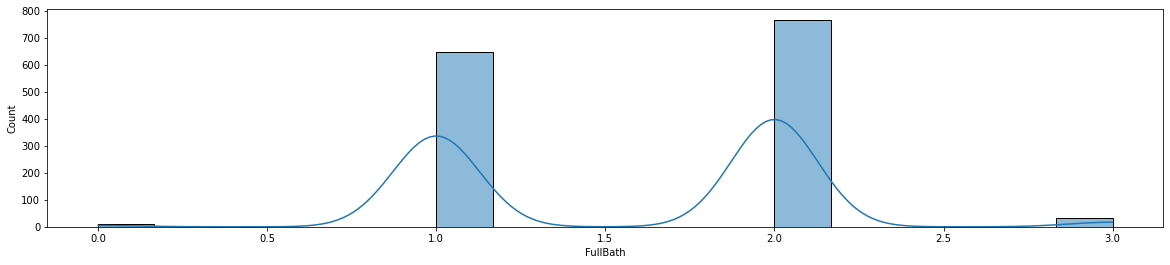

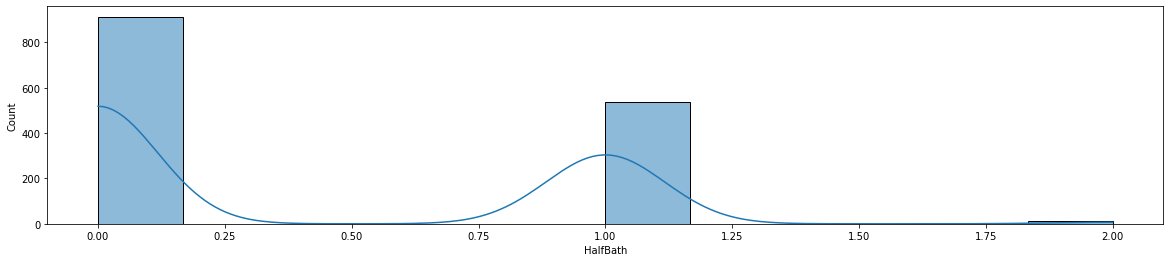

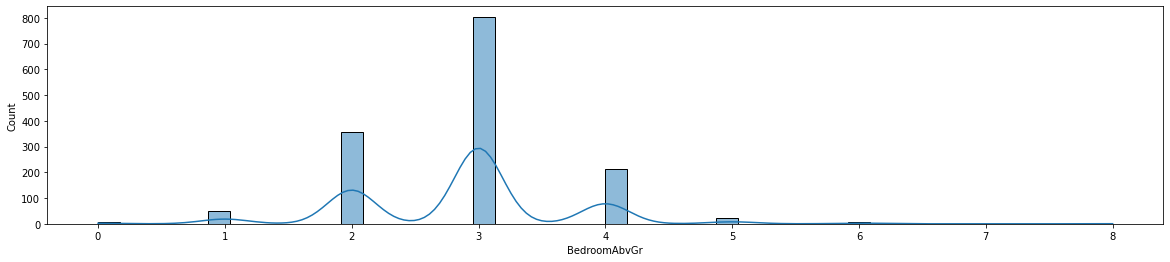

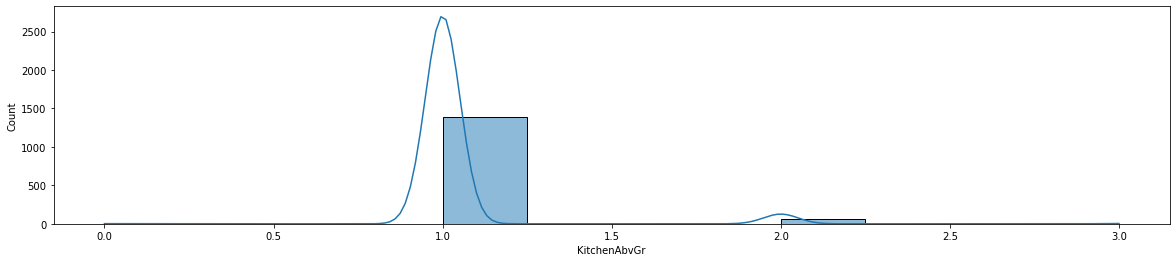

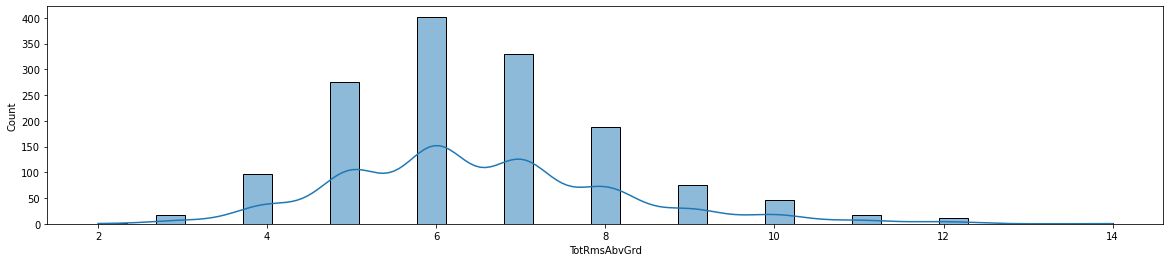

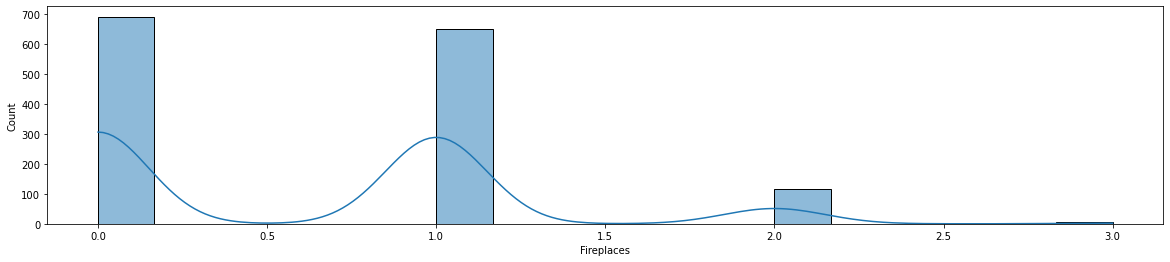

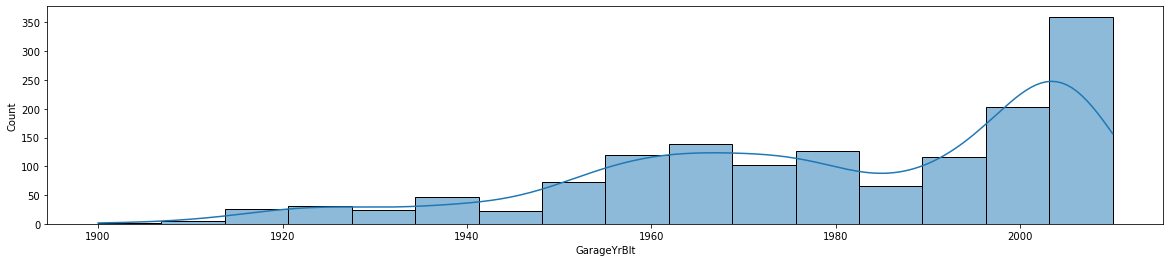

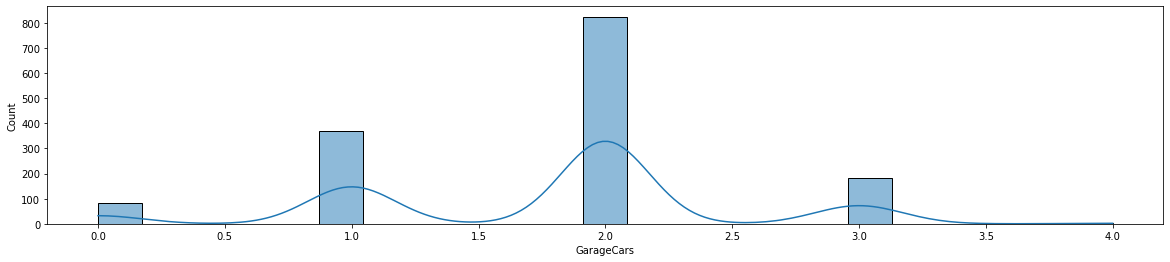

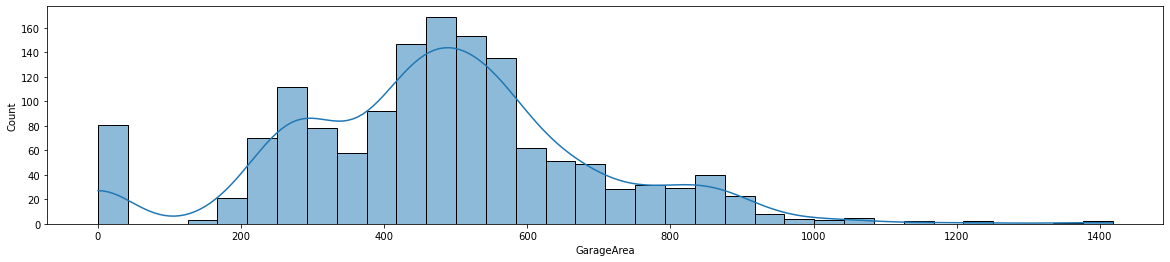

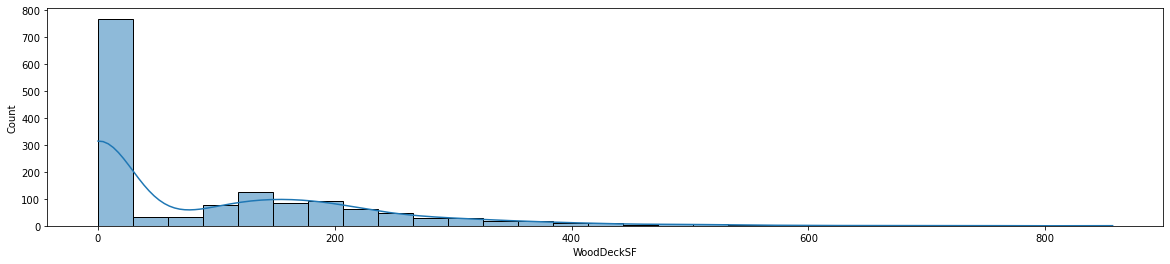

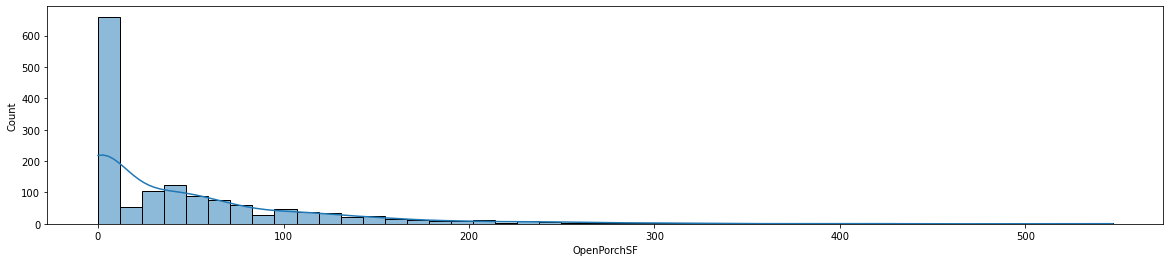

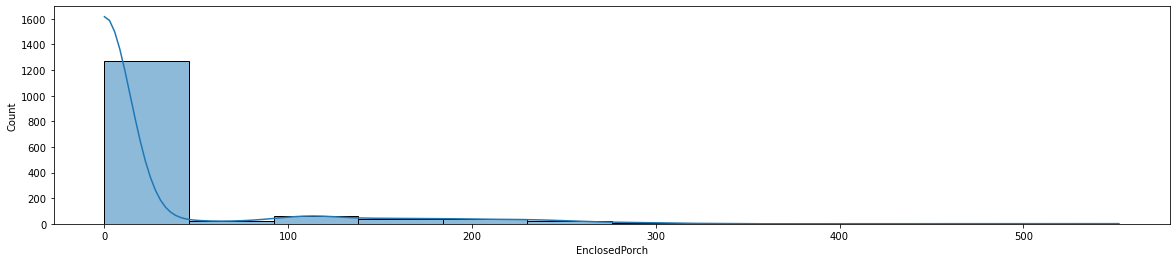

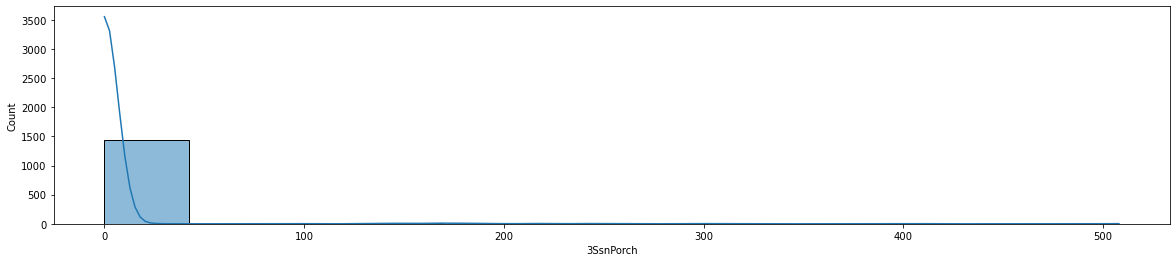

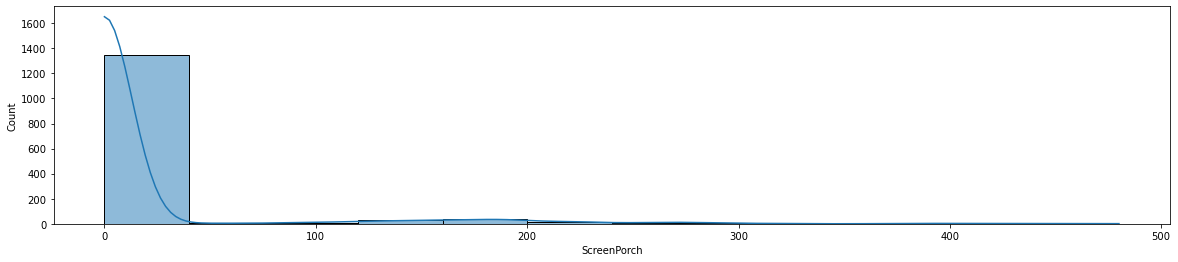

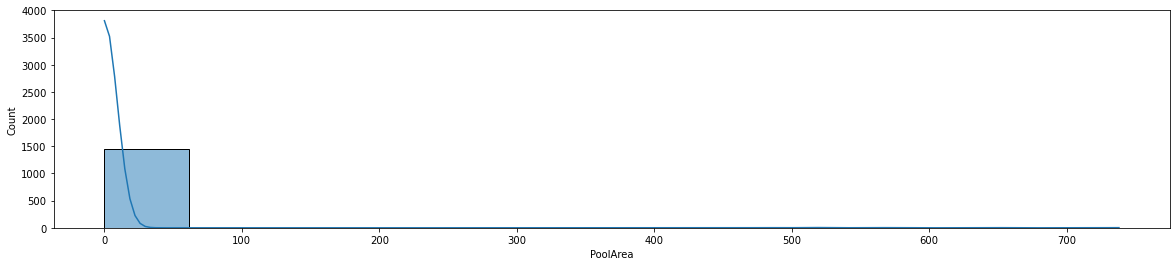

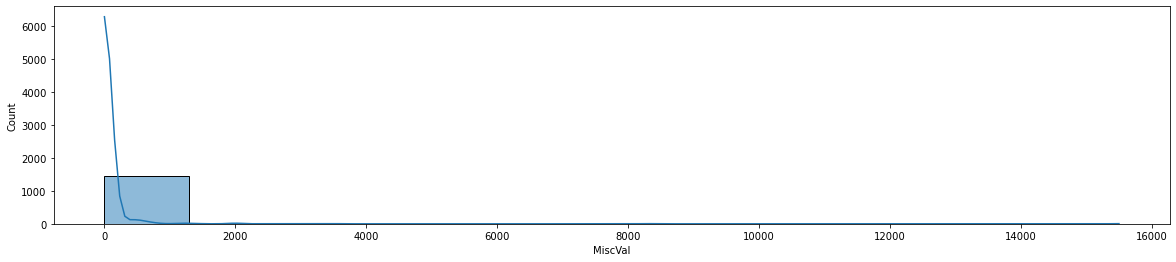

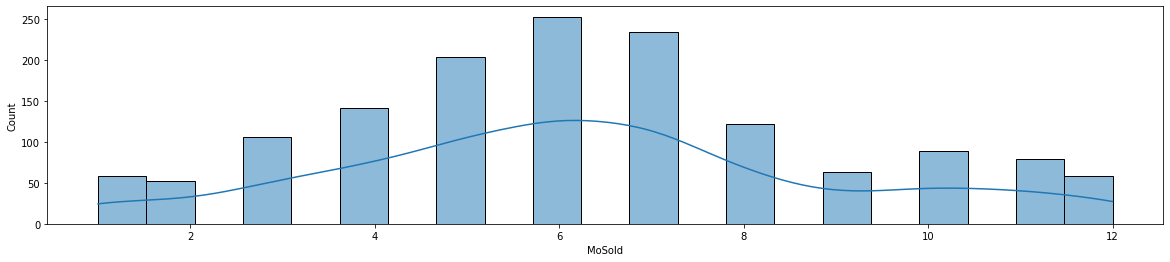

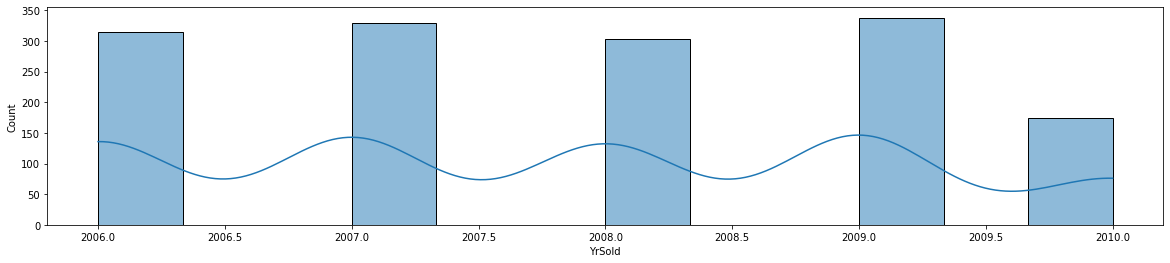

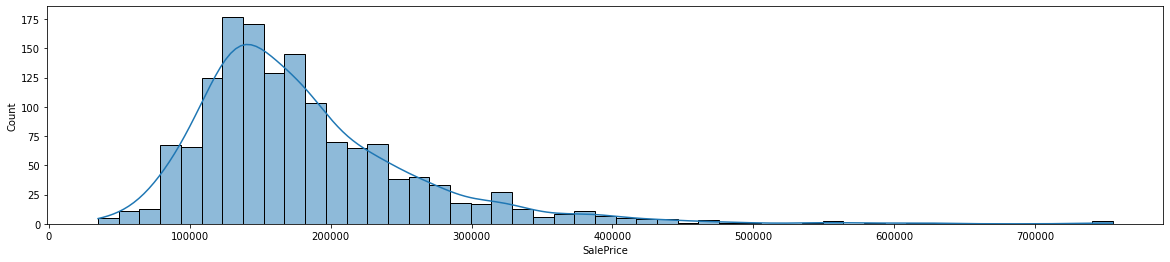

In [13]:
# let's plot all the columns to look at their distributions
for i in numeric_columns:
    plt.figure(figsize=(20, 4))
    sns.histplot(data=houses, x=i, kde = True)
    plt.show()

- Observations:
    * Most of the numerical variable's distribution are skewed, and many outliers observed.

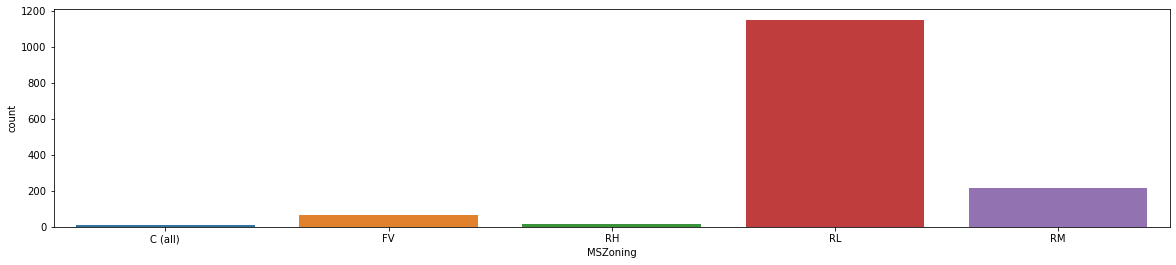

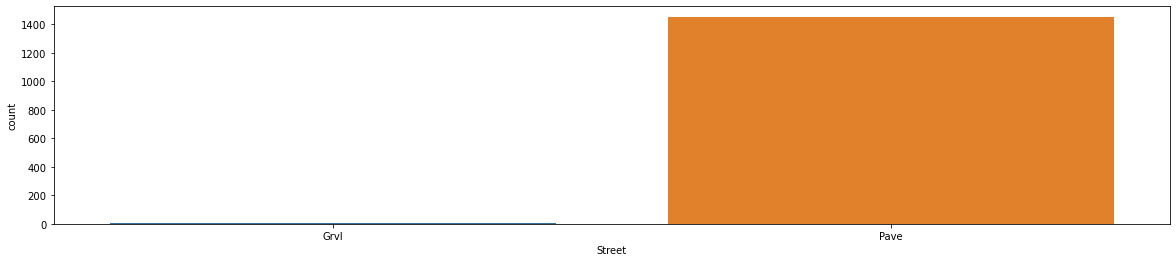

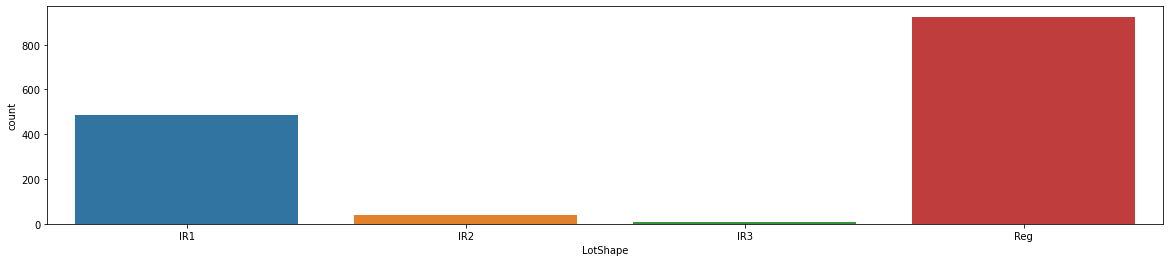

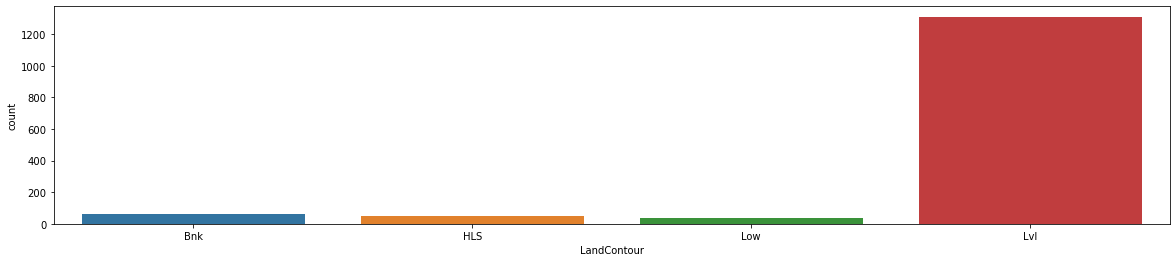

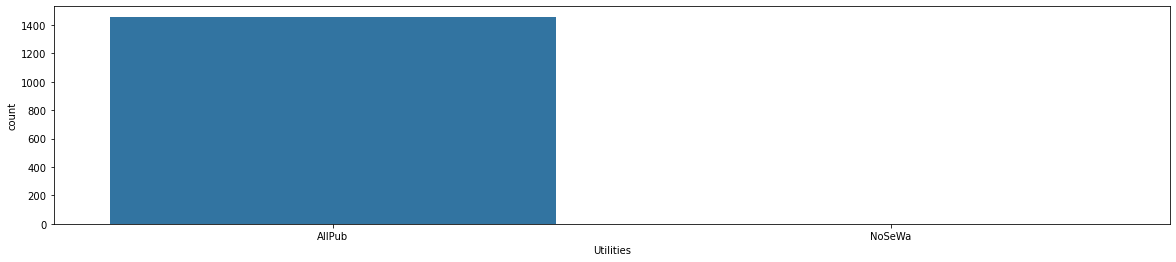

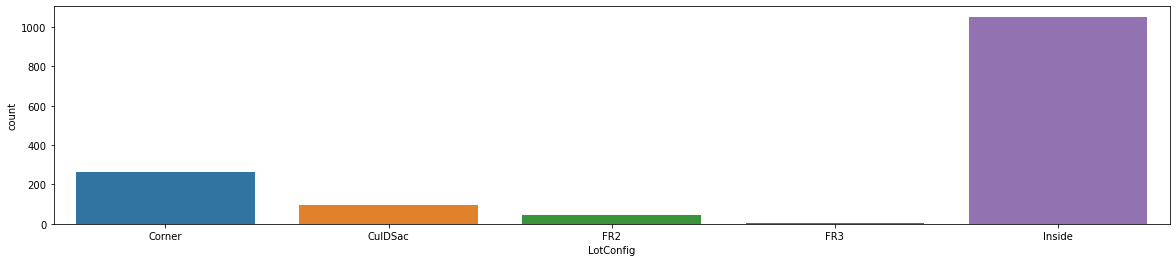

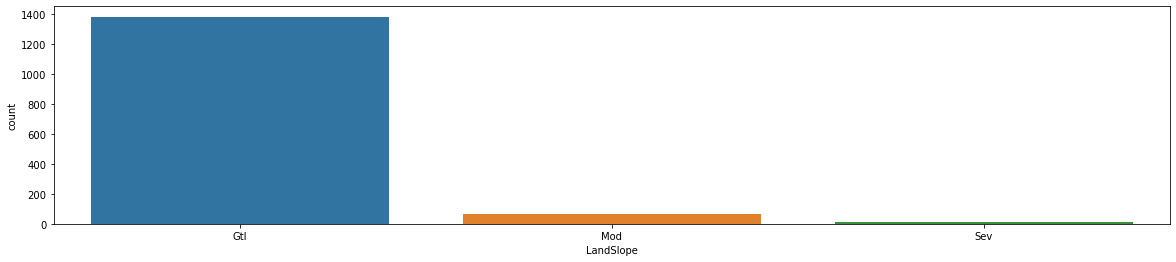

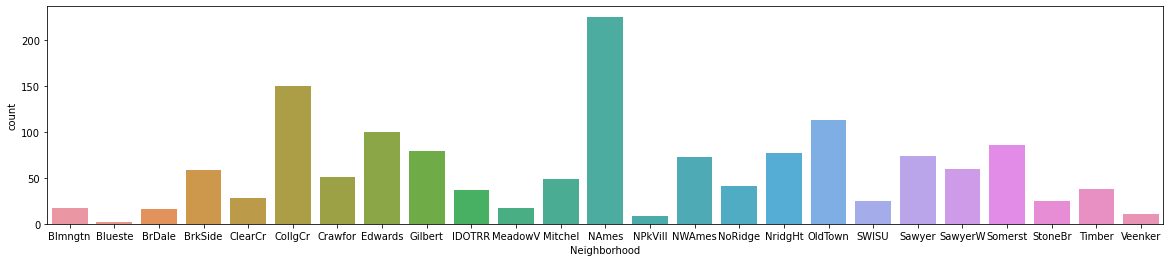

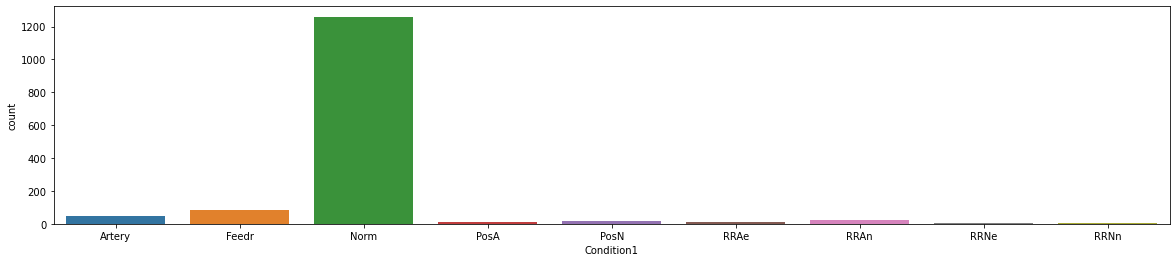

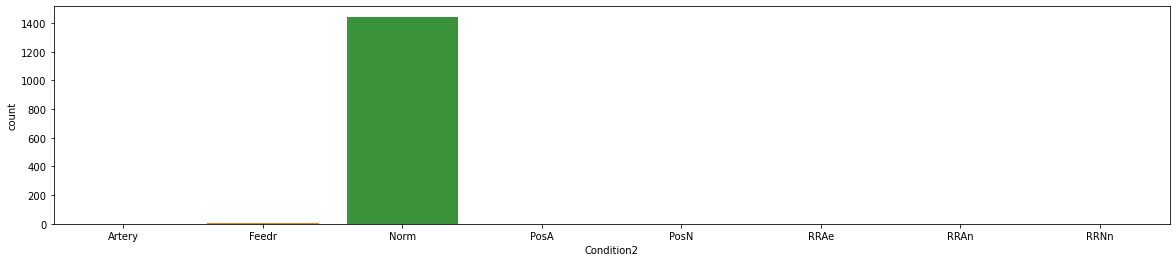

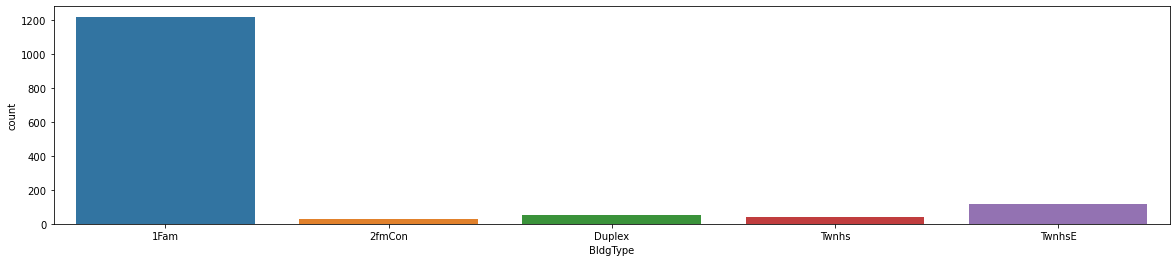

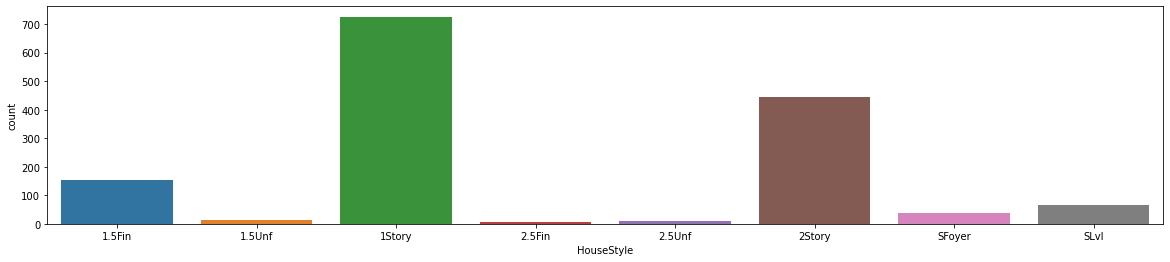

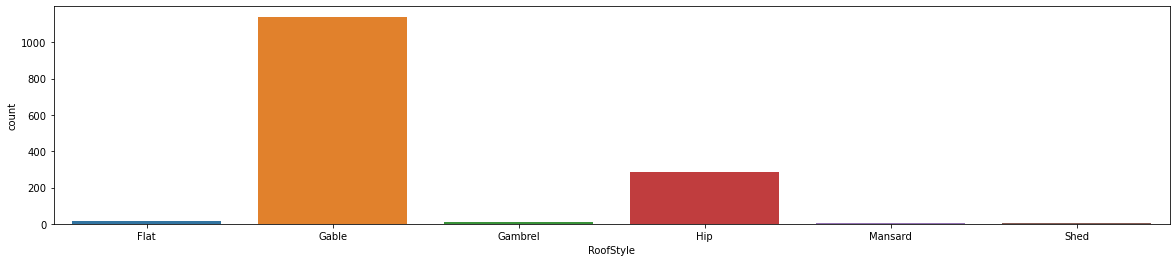

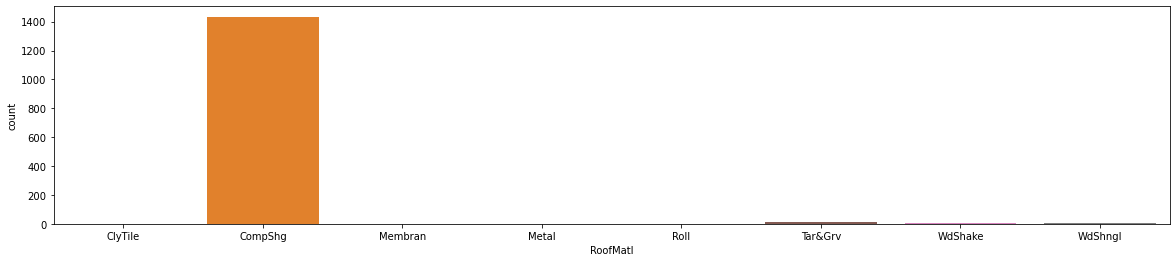

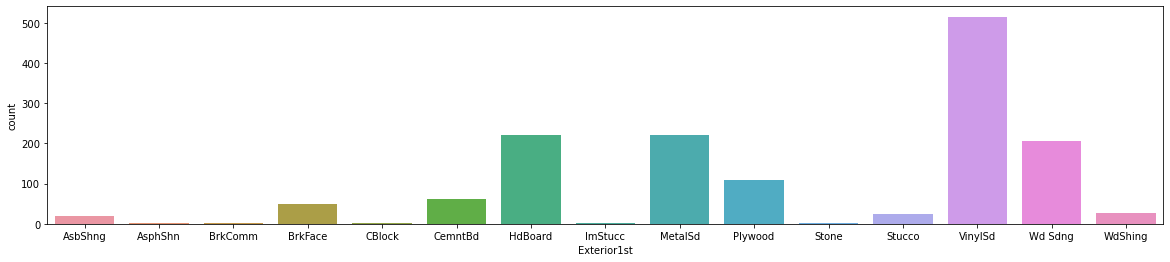

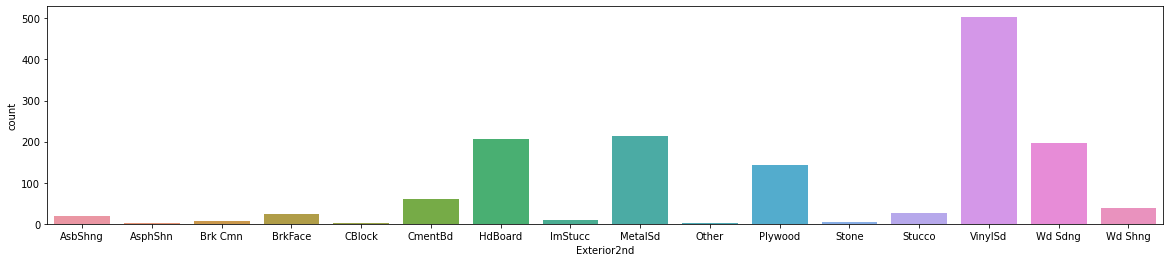

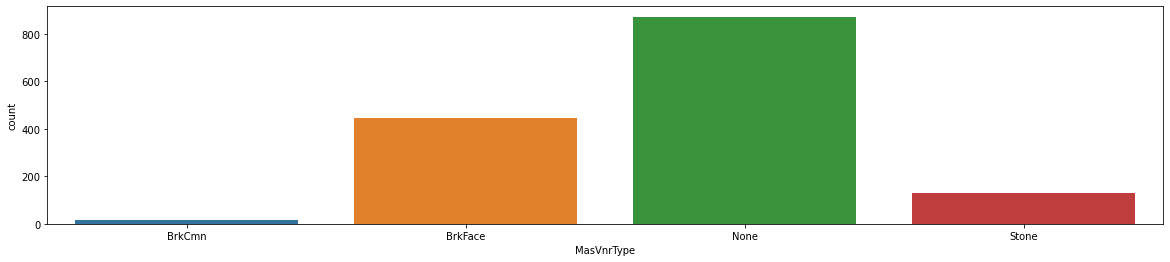

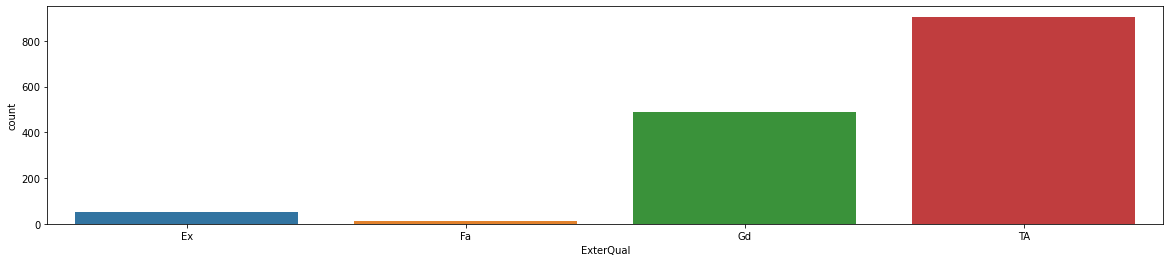

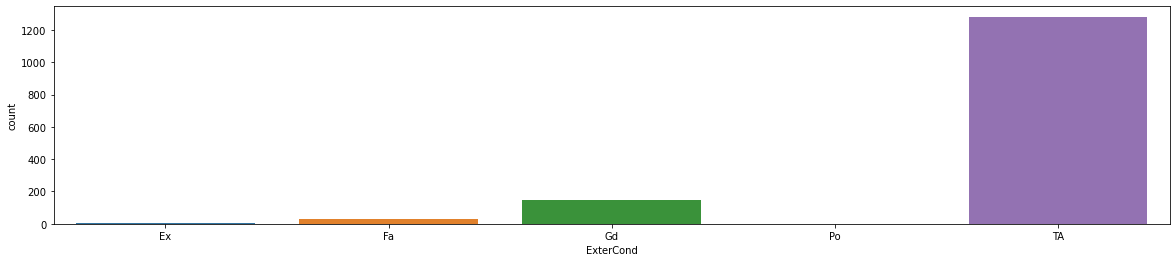

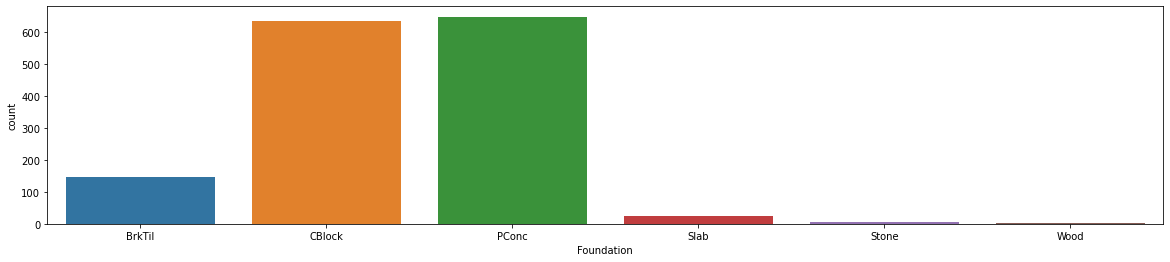

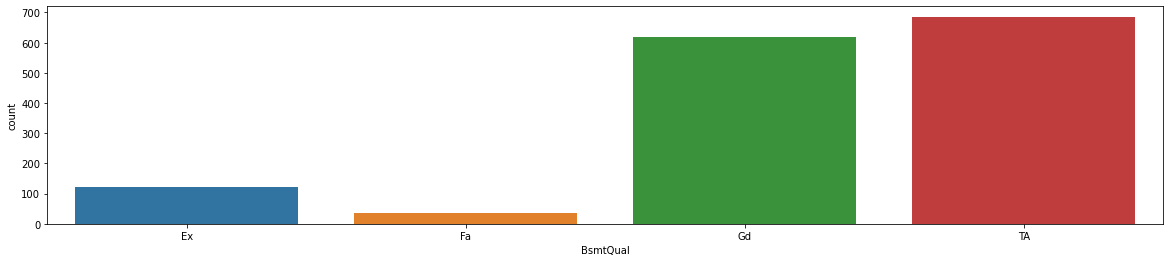

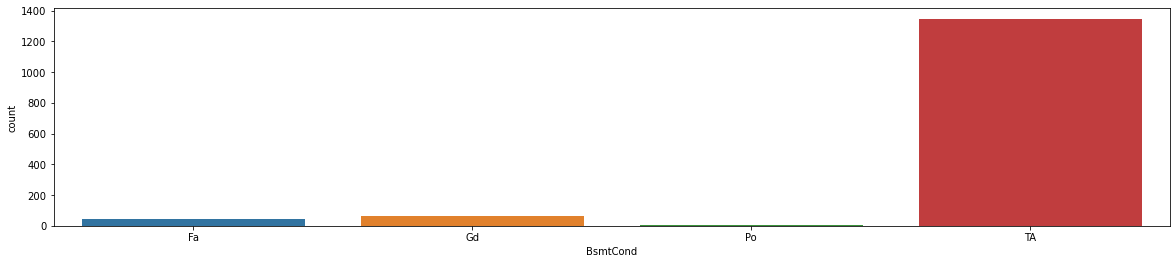

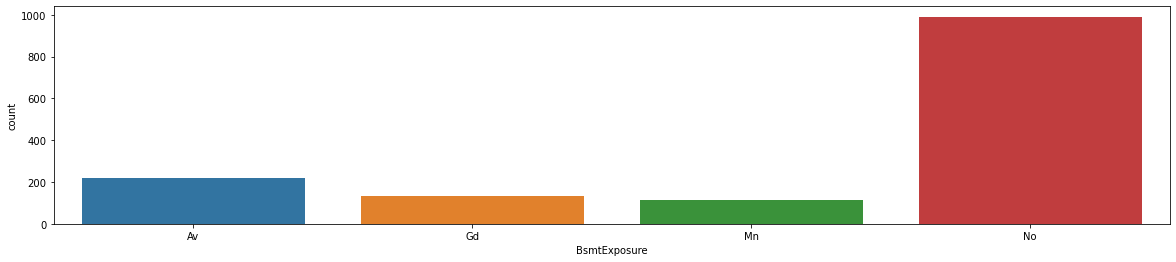

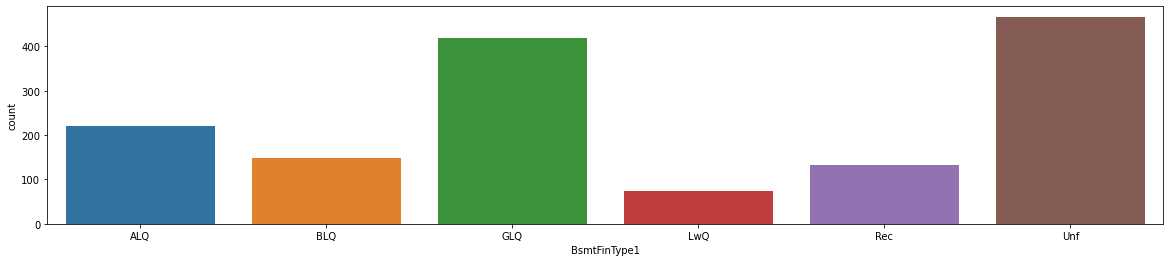

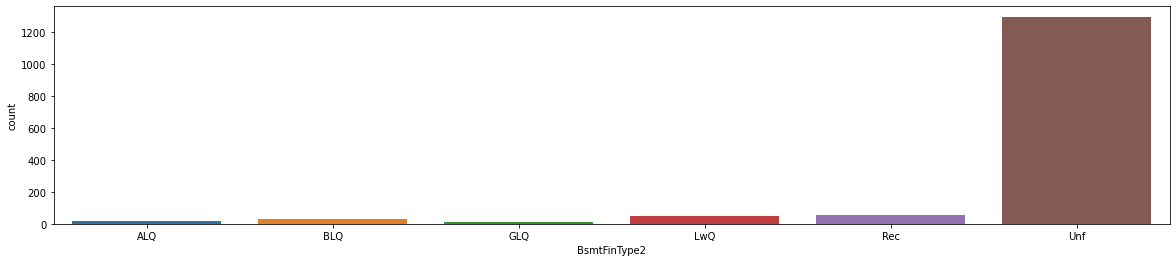

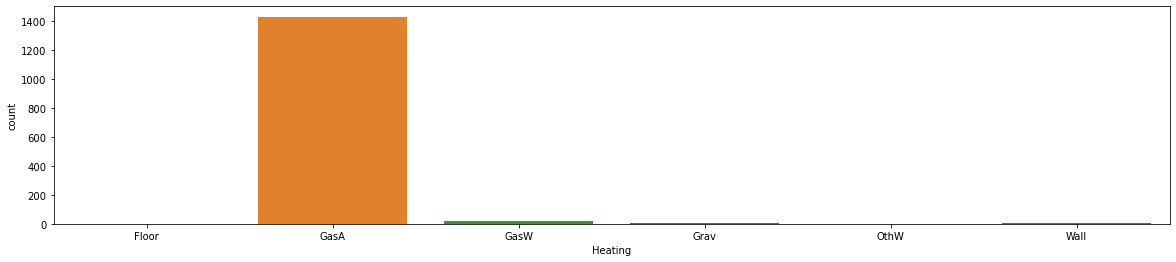

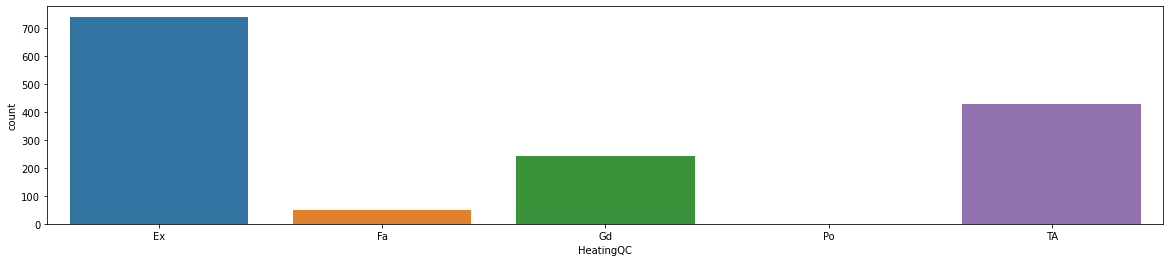

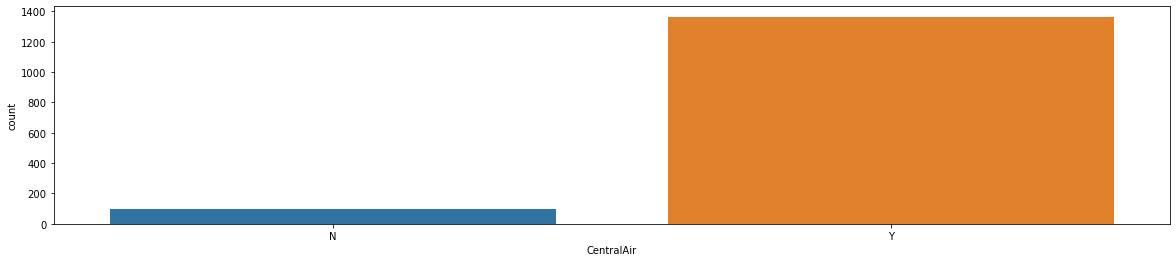

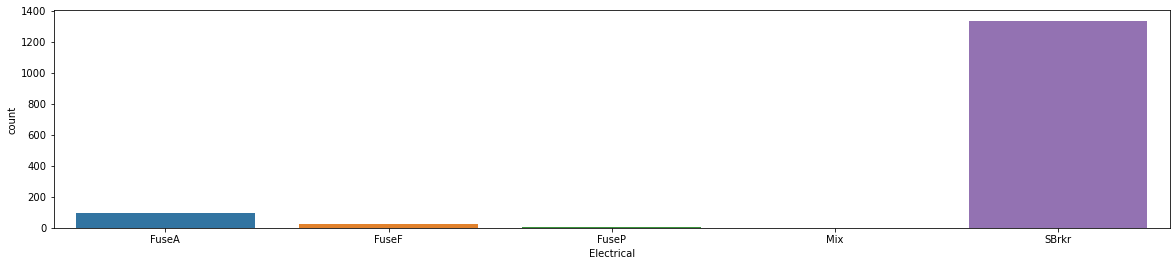

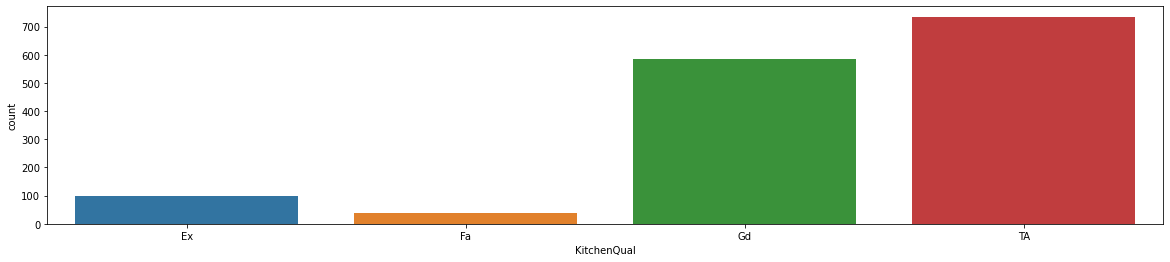

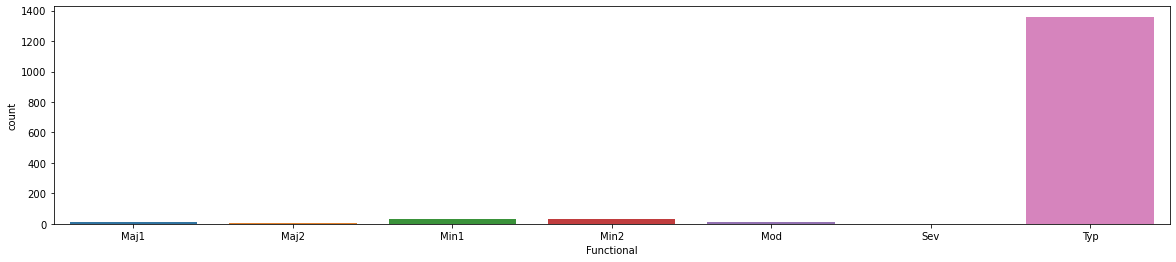

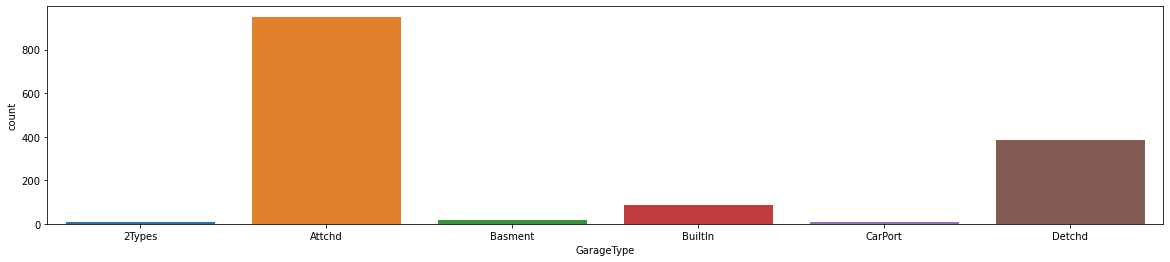

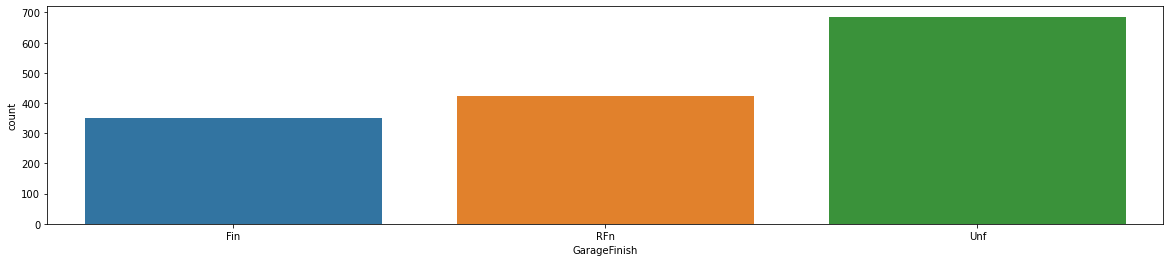

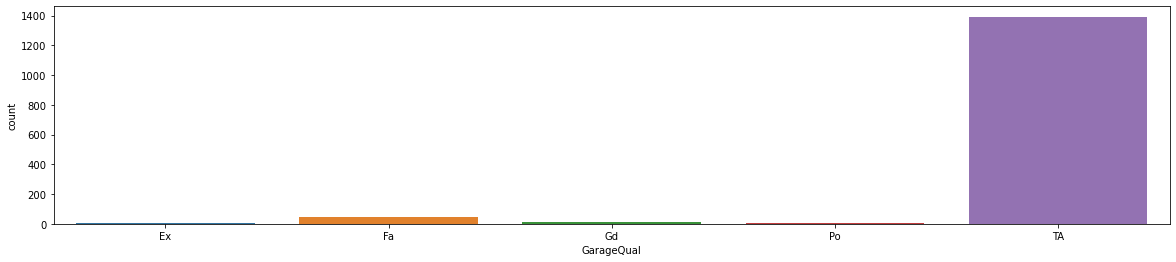

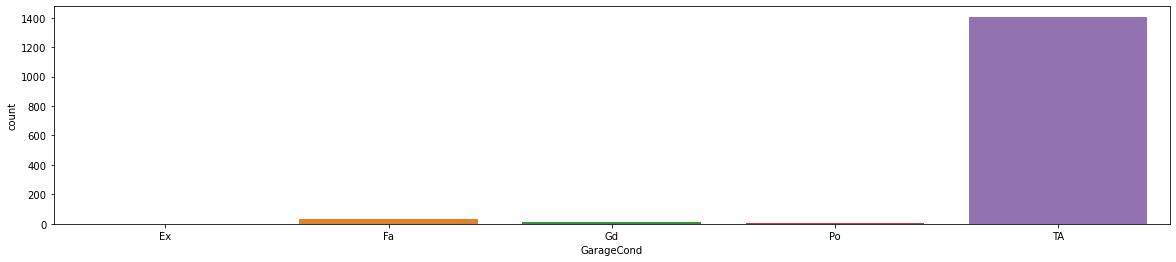

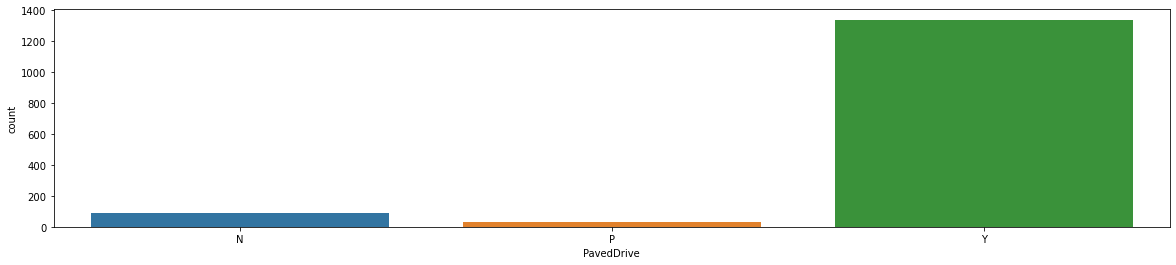

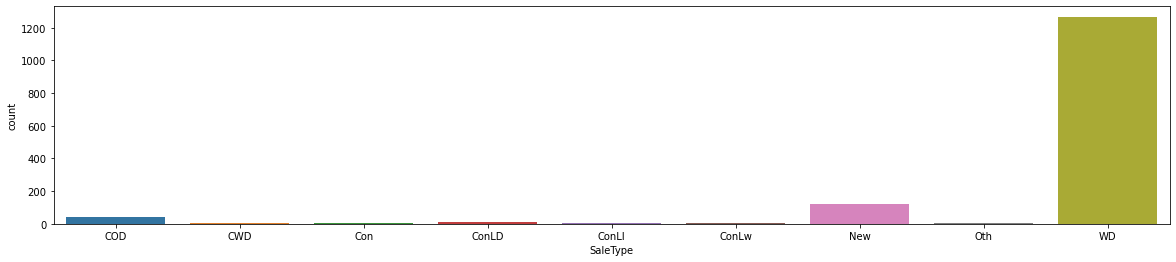

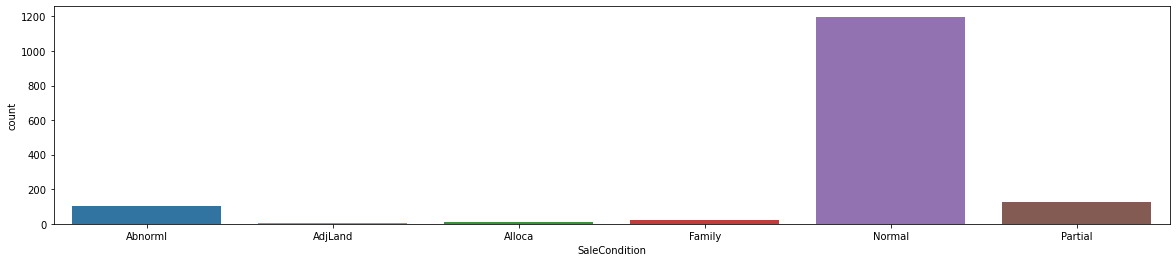

In [14]:
# let's plot all the columns to look at their distributions
for i in cat_columns:
    plt.figure(figsize=(20, 4))
    sns.countplot(data=houses, x=i)
    plt.show()

- Observations:
    * Many variances on [Neighbordhood, Exterior1st, Exterior2nd] variables.
    * Majority of top houses are with RL in MSZoning, Pave in Street, Reg in LotShape, Lvl in LandCountour, AllPub in Utilities, Inside in LotConfig, Gtl in LandSlope, Norm in Condition1 and Condition2, TA in GarageFinish and GarageCond, Y in PavedDrive, WD in SaleType, Normal in SaleCondition.

#### Bivariate Analysis

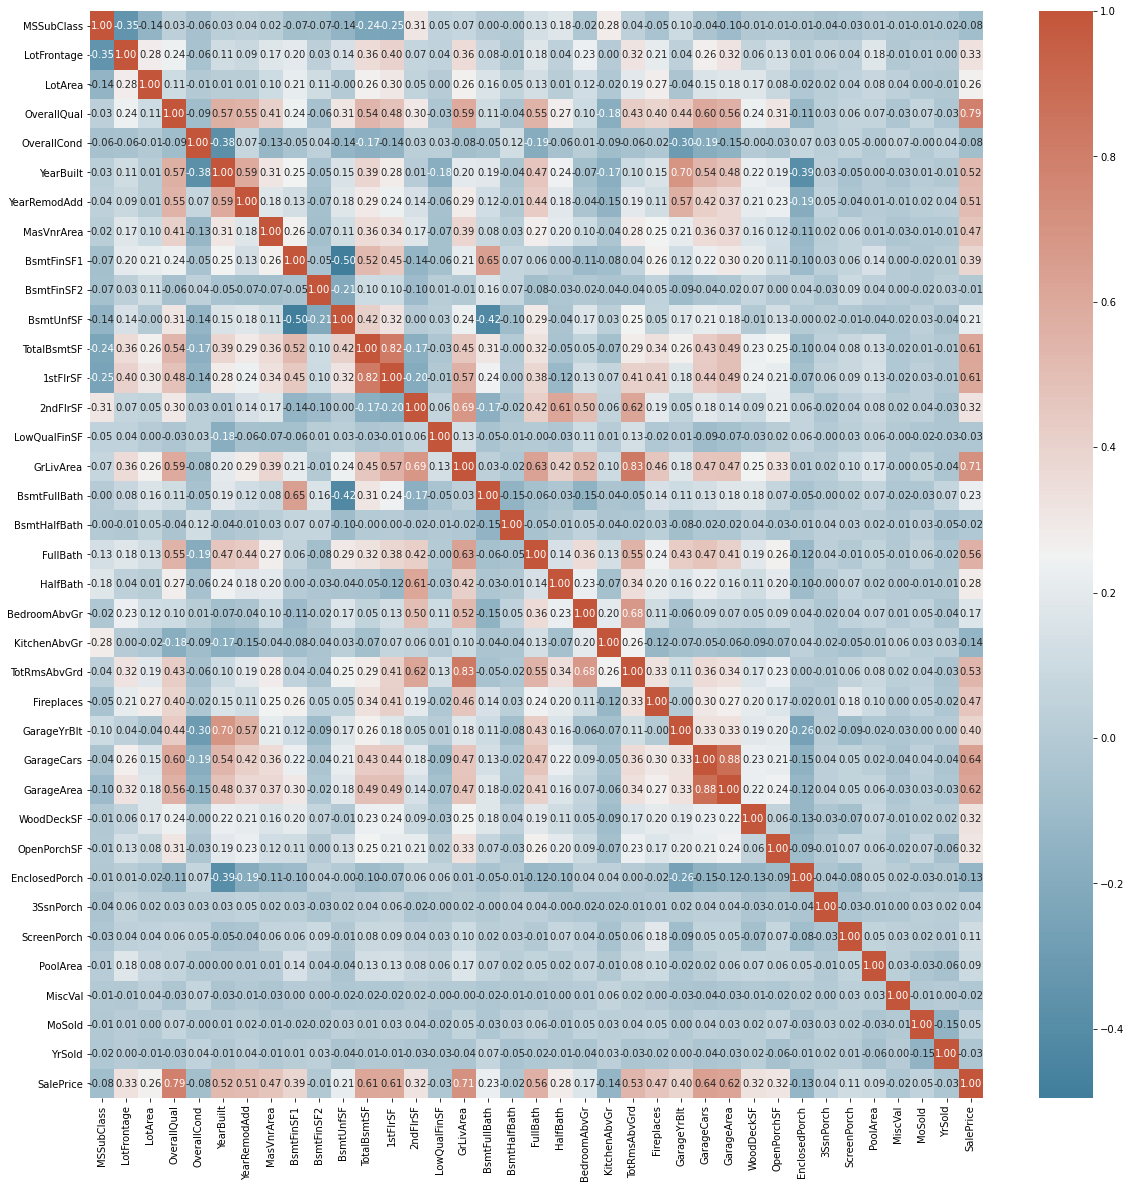

In [15]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(houses.corr(),annot=True,fmt='.2f',cmap=cmap ) #write your code here
plt.show()

- Observations:
    * Many Correlated variables observed we will analyse those and clean the collinearity.

### Detect & Deal with Outlier

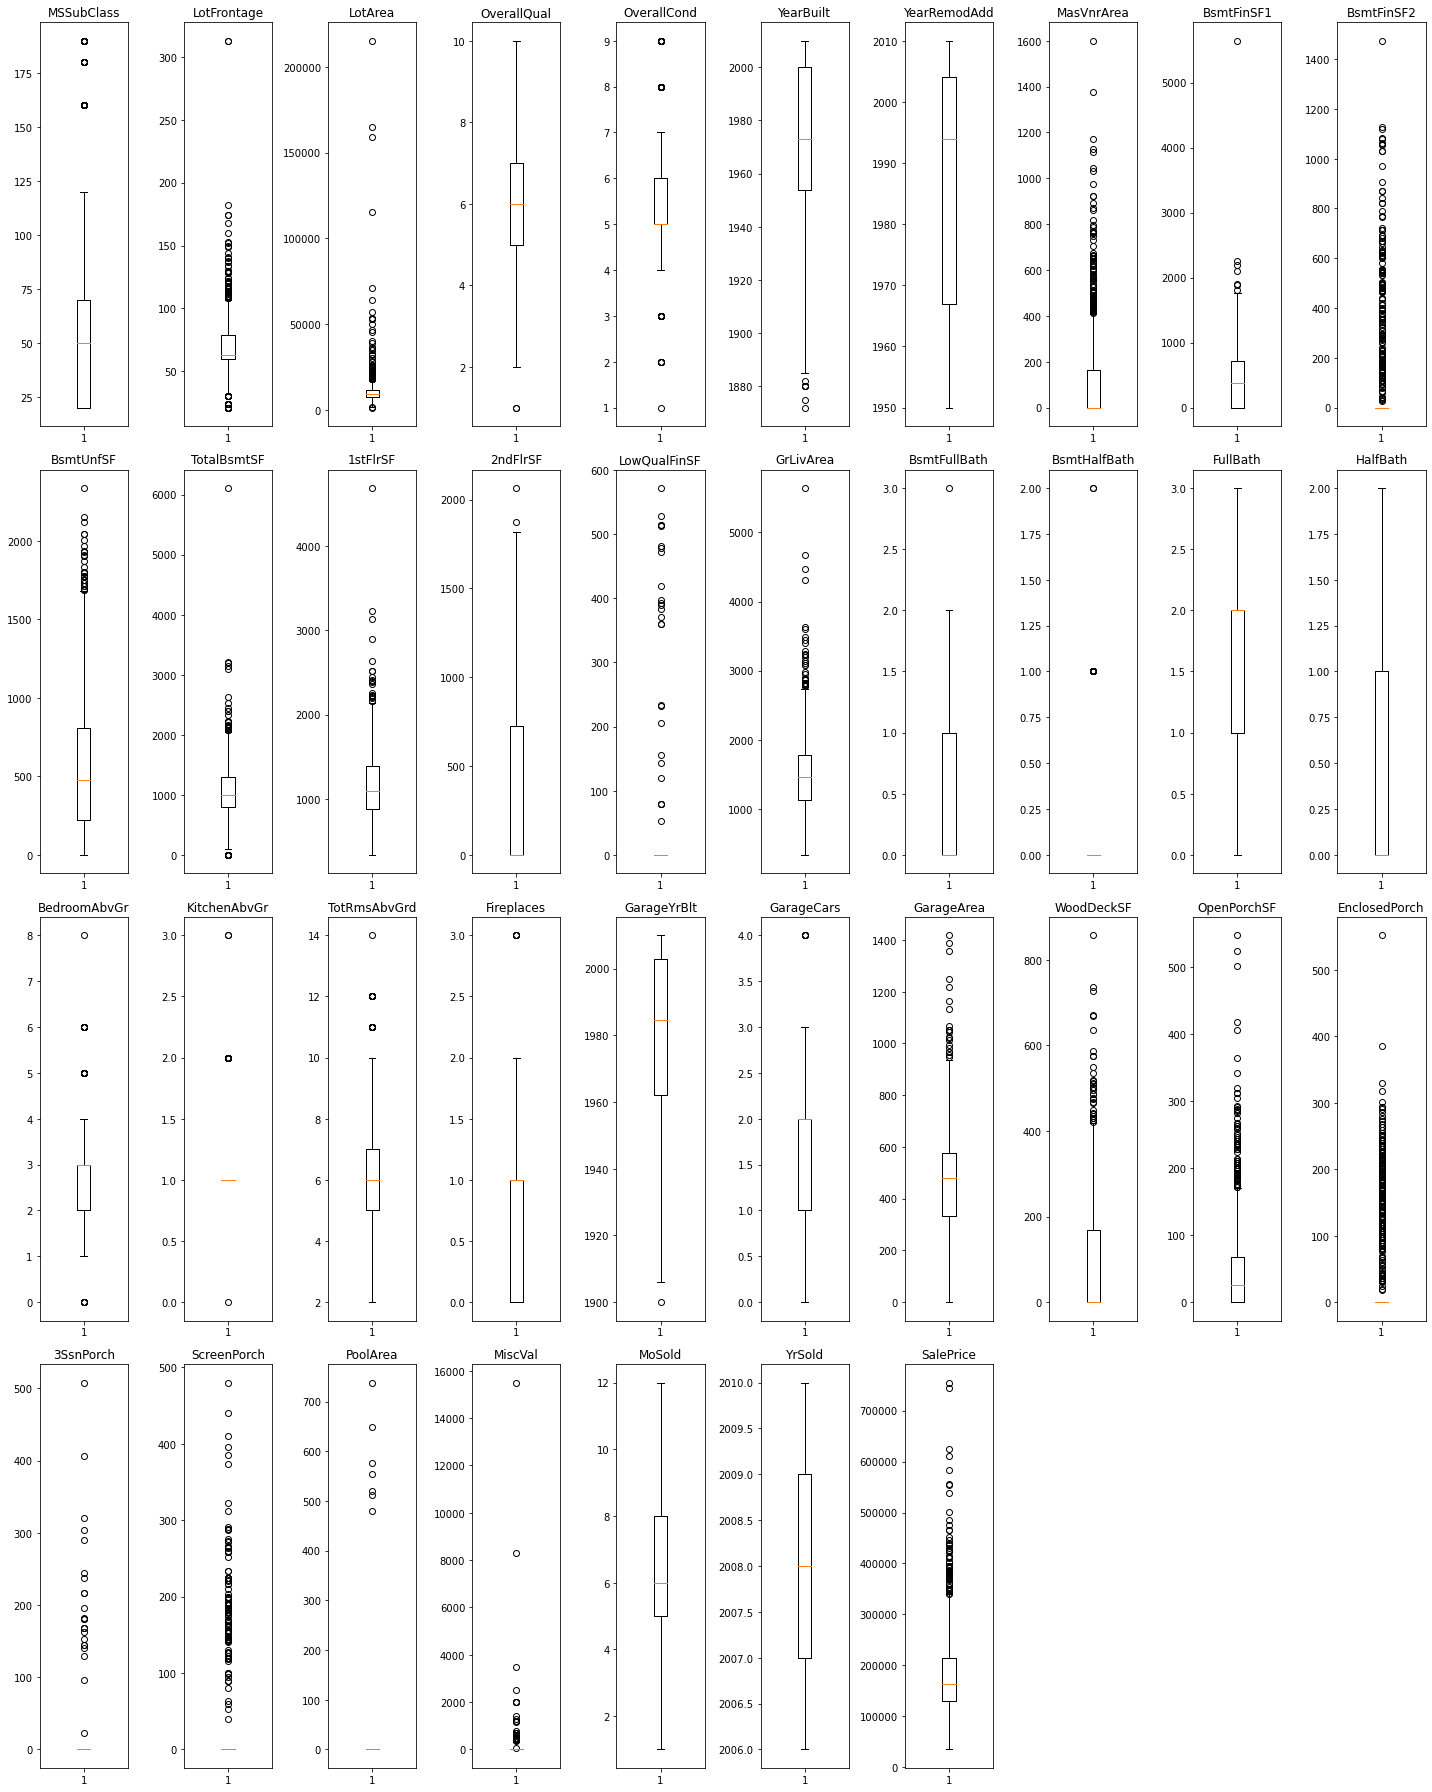

In [16]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 25))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 10, i + 1)
    plt.boxplot(houses[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Observations:
    * Outliers observed on all the numerical variables except on the [FullBath, HalfBath, MoSold] variables

In [17]:
# Let's treat outliers
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df


def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)

    return df
numeric_columns_outliers = [x for x in numeric_columns if x not in ['FullBath', 'HalfBath',
                                                                    'MoSold', 'BsmtFinSF2',
                                                                   'LowQualFinSF', 'BsmtHalfBath',
                                                                   'KitchenAbvGr', 'EnclosedPorch',
                                                                   '3SsnPorch', 'ScreenPorch',
                                                                   'PoolArea', 'MiscVal']]
houses = treat_outliers_all(houses, numeric_columns_outliers)

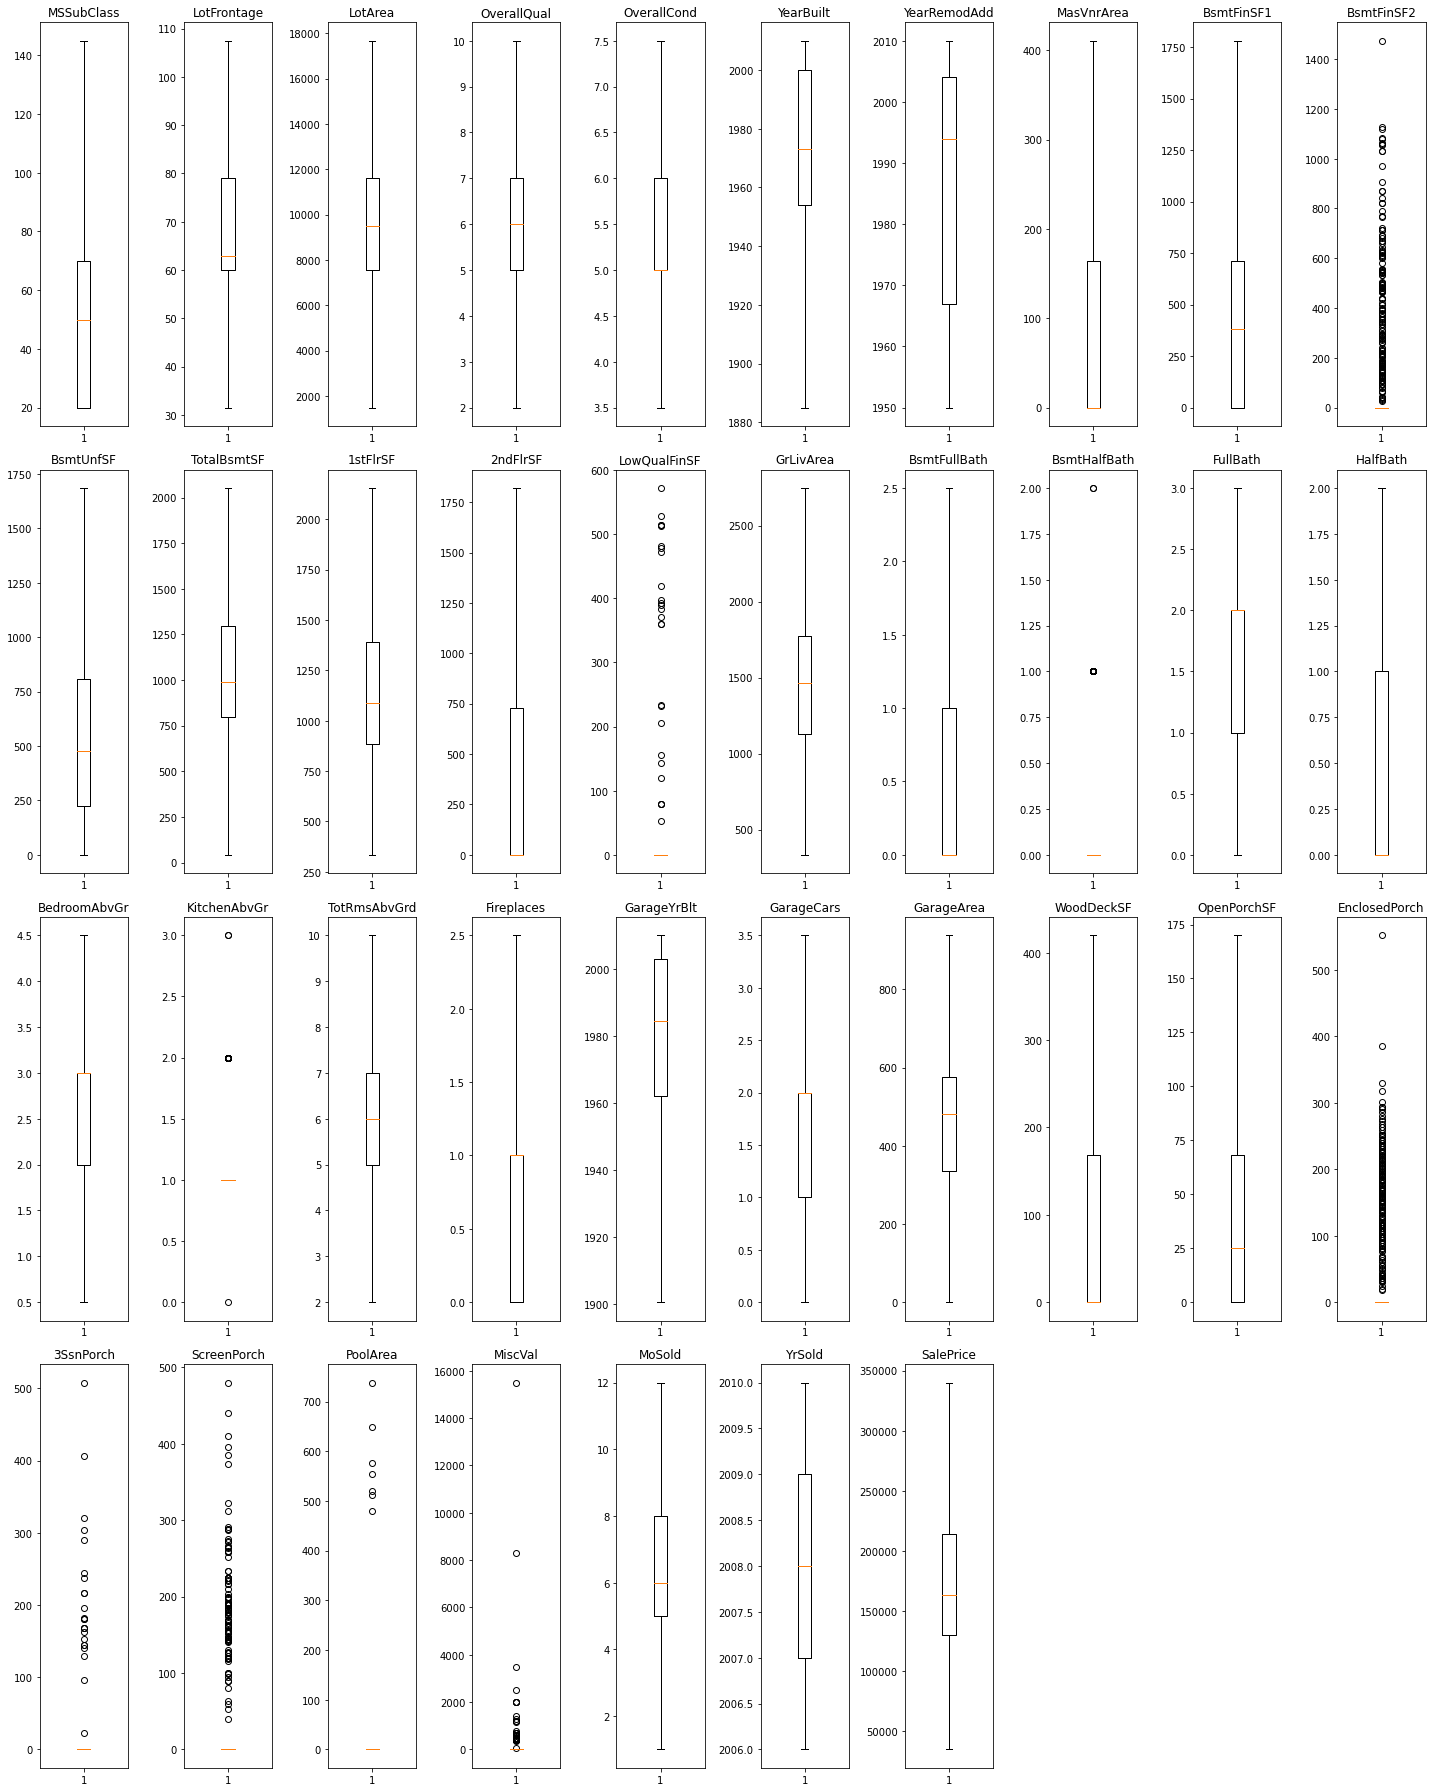

In [18]:
# let's plot again the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 25))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 10, i + 1)
    plt.boxplot(houses[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Observations:
    * Outliers still exist but to avoid changing too much on the data and insight it's look acceptable.

## Regression Modeling

In [19]:
# convert into dummies - one hot encoding
houses_dum = pd.get_dummies(houses, drop_first=True)
print(houses_dum.shape)
houses_dum.head()

(1460, 233)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.000,65.000,8450.000,7.000,5.000,2003.000,2003,196.000,706.000,0,150.000,856.000,856.000,854.000,0,1710.000,1.000,0,2,1,3.000,1,8.000,0.000,2003.000,2.000,548.000,0.000,61.000,0,0,0,0,0,2,2008,208500.000,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0

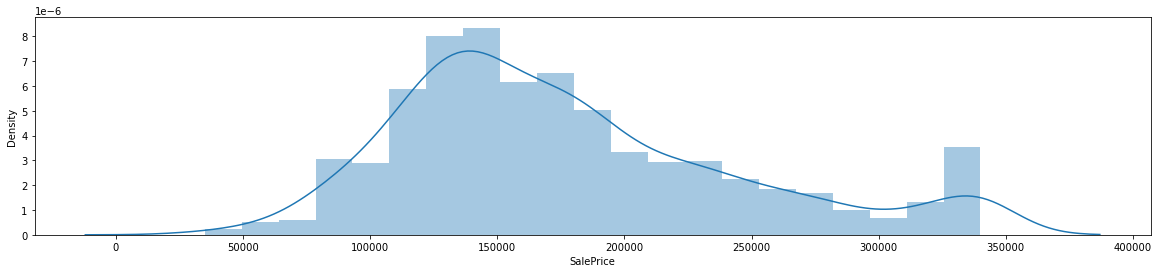

In [20]:
#lets check the distribution of our target variable:
plt.figure(figsize=(20,4))
sns.distplot(houses_dum['SalePrice'])
plt.show()

- Observations:
    * The target variable looks kind of normally distributed which is a good sign for modeling.

In [21]:
##splitting the data to train & test sets
train_df, test_df = train_test_split(houses_dum,train_size=0.7,test_size=0.3,random_state=42)

In [22]:
cols = houses_dum.columns
train_df = pd.DataFrame(scale(train_df))
test_df = pd.DataFrame(scale(test_df))

train_df.columns = cols
test_df.columns = cols

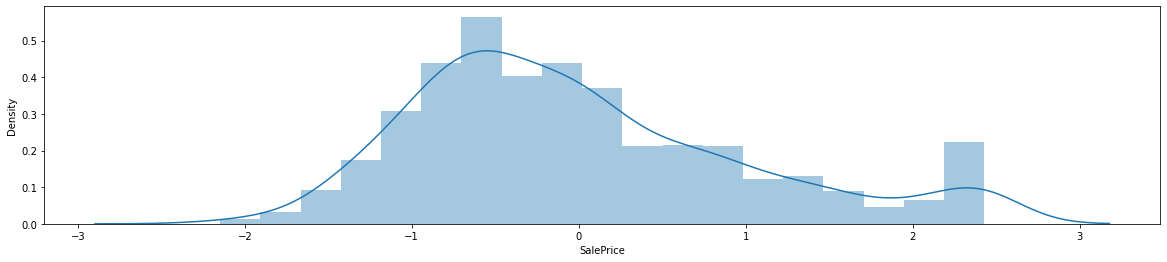

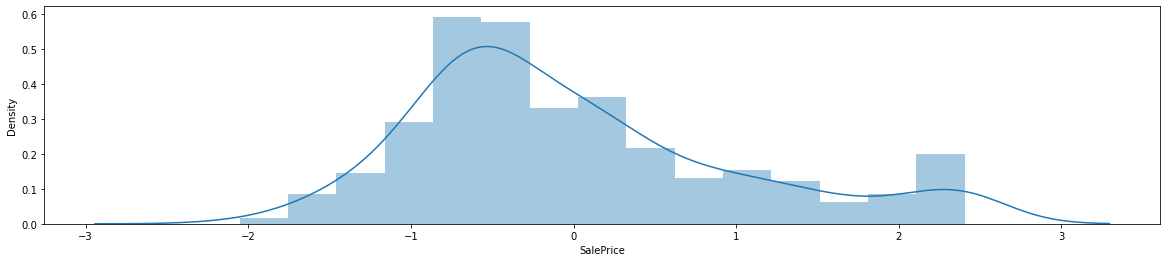

In [23]:
#lets check the distribution of our target variable on the train set:
plt.figure(figsize=(20,4))
sns.distplot(train_df['SalePrice'])
plt.show()

#lets check the distribution of our target variable on the test set:
plt.figure(figsize=(20,4))
sns.distplot(test_df['SalePrice'])
plt.show()

- Observations:
    * identical distribution indicate a good date split

In [24]:
# split into train and test
X_train = train_df.drop(['SalePrice'], axis=1)
X_test = test_df.drop(['SalePrice'], axis=1)
y_train = train_df['SalePrice']
y_test = test_df['SalePrice']

## Building model 

In [25]:
## let use RFE for better feature selection:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 80)
rfe.fit(X_train,y_train)

rfe_result = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_result.columns = ['Features','Status','Rank']
rfe_result

,Features,Status,Rank
0,MSSubClass,False,80
1,LotFrontage,False,100
2,LotArea,True,1
3,OverallQual,True,1
4,OverallCond,True,1
...,...,...,...
227,SaleCondition_AdjLand,False,34
228,SaleCondition_Alloca,True,1
229,SaleCondition_Family,False,114
230,SaleCondition_Normal,True,1


In [26]:
## lets filter the selecte RFE features and assign that to the train, test sets
rfe_top_features = list(rfe_result[rfe_result.Status==True].Features)

X_train = X_train[rfe_top_features]
X_test = X_test[rfe_top_features]

### 1_Linear Regression

In [27]:
## let use LinearRegression as our first Model of scores reference:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [28]:
# Print the coefficients and intercept
print(lr2.intercept_)
print(lr2.coef_)

3.4712613646603467e-16
[ 7.60669968e-02  1.50373242e-01  8.69277435e-02  1.85401518e-01
  4.65452526e-02 -1.82062665e-01 -8.63223516e-02 -2.77564426e-01
  3.46670708e-01  3.49715810e-01  3.94791462e-02 -5.81265558e-02
  5.19780573e-02  4.83245839e-02  5.24672144e-02  8.23802535e-02
  5.02902888e-02  1.65402929e-01  9.96027225e-02 -7.08364448e-02
 -7.60238254e-02 -5.78915518e-02 -3.84313096e-02 -6.12950898e-02
 -1.12958226e-01 -6.96437227e-02 -4.27344379e-02 -5.15170212e-02
 -4.76318901e-02  4.67521761e-02 -5.22073088e+08 -6.78283888e-02
  1.28749830e+08 -4.49483842e-02 -3.32764685e-02 -6.23467937e-02
 -4.47927713e-02  4.71606299e-01  4.66239769e+08  1.02189861e-01
  1.11015759e-01  3.33105966e-01  1.88607013e-01  2.35313803e-01
 -1.85407370e+10 -8.66046026e-02 -1.97025280e+07 -6.35788515e-02
 -7.74677172e-02 -8.90993699e-02 -1.31491855e-01 -3.69632244e-02
  1.85407370e+10  6.04342669e-02 -9.96678472e-02 -1.08464077e-01
  1.43302977e-02  3.22782397e-02 -7.90758083e+05 -3.76893282e-02
 -

In [29]:
y_pred_train = lr2.predict(X_train)
y_pred_test = lr2.predict(X_test)

metric1 = []
print('-'*10 + 'Train Set' + '-'*10)
r2_train = r2_score(y_train, y_pred_train)
print(f'R2 Score : {r2_train}')
metric1.append(r2_train)

rss1 = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Score : {rss1}')
metric1.append(rss1)

mse_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE Score : {mse_train}')
metric1.append(mse_train**0.5)

print('')
print('-'*10 + 'Test Set' + '-'*10)
r2_test = r2_score(y_test, y_pred_test)
print(f'R2 Score : {r2_test}')
metric1.append(r2_test)

rss2 = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Score : {rss2}')
metric1.append(rss2)

mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE Score : {mse_test}')
metric1.append(mse_test**0.5)

----------Train Set----------
R2 Score : 0.9304950530800833
RSS Score : 70.96455080523494
MSE Score : 0.06950494691991668

----------Test Set----------
R2 Score : -5.0807754493596474e+17
RSS Score : 2.2253796468195262e+20
MSE Score : 5.080775449359649e+17


- Observations:
    * This Model is very bad on the test set which indicate a high overfitting. [scores : 93% / -5.08e+17%]

### 2_Ridge Regression

In [30]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [31]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [32]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

coef_data = pd.DataFrame(columns=['Features', 'coefficients'])
coef_data['Features'] = X_train.columns
coef_data['coefficients'] = ridge.coef_
coef_data.sort_values(by=['coefficients'], ascending=False)[:10]

,Features,coefficients
9,GrLivArea,0.315
37,RoofMatl_CompShg,0.182
1,OverallQual,0.169
3,YearBuilt,0.141
41,RoofMatl_Tar&Grv,0.129
8,TotalBsmtSF,0.127
43,RoofMatl_WdShngl,0.106
0,LotArea,0.082
2,OverallCond,0.078
13,GarageCars,0.073


In [33]:
print(ridge.coef_)

[ 8.18877380e-02  1.69099440e-01  7.75228526e-02  1.41499977e-01
  5.44827424e-02  4.81226403e-02 -4.77217117e-03 -3.99964818e-02
  1.26612598e-01  3.14583035e-01  3.32823171e-02 -5.57092468e-02
  5.62874521e-02  7.29628284e-02  4.44341222e-02  3.05841959e-02
  1.56832680e-02  5.20938010e-02 -3.80136021e-03 -6.30075061e-02
 -7.37715935e-02 -5.51569856e-02 -2.83324378e-02 -5.61437814e-02
 -1.02010573e-01 -6.43655415e-02 -4.11537910e-02 -4.80768616e-02
 -4.22898629e-02  4.95924624e-02  0.00000000e+00 -6.46100971e-02
  0.00000000e+00 -3.99620139e-02 -2.70873137e-02 -4.66605133e-02
 -2.81109498e-02  1.81613760e-01  0.00000000e+00  3.36069543e-02
  4.45999708e-02  1.29160053e-01  7.09318310e-02  1.05888002e-01
 -1.45970650e-04 -6.10988937e-02  0.00000000e+00 -4.14224992e-02
 -5.56179166e-02 -4.88684538e-02 -9.41905623e-02 -2.72302631e-02
 -1.45970650e-04  4.48356870e-02 -8.46604974e-02 -9.69780794e-02
  1.47456841e-02  2.77726323e-02  0.00000000e+00 -2.77765591e-02
 -7.00952707e-02 -1.14379

In [34]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
print('-'*10 + 'Train Set' + '-'*10)
r2_train = r2_score(y_train, y_pred_train)
print(f'R2 Score : {r2_train}')
metric2.append(r2_train)

rss1 = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Score : {rss1}')
metric2.append(rss1)

mse_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE Score : {mse_train}')
metric2.append(mse_train**0.5)

print('')
print('-'*10 + 'Test Set' + '-'*10)
r2_test = r2_score(y_test, y_pred_test)
print(f'R2 Score : {r2_test}')
metric2.append(r2_test)

rss2 = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Score : {rss2}')
metric2.append(rss2)

mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE Score : {mse_test}')
metric2.append(mse_test**0.5)

----------Train Set----------
R2 Score : 0.9228117976944105
RSS Score : 78.80915455400688
MSE Score : 0.0771882023055895

----------Test Set----------
R2 Score : 0.9061724308207197
RSS Score : 41.09647530052475
MSE Score : 0.09382756917928026


- Observations:
    * The Ridge Model is performing very well and can be better with more hyper-parameter tuning. [scores : 93% / 90%]

### 3_Lasso

In [35]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [37]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

coef_data = pd.DataFrame(columns=['Features', 'coefficients'])
coef_data['Features'] = X_train.columns
coef_data['coefficients'] = lasso.coef_
coef_data.sort_values(by=['coefficients'], ascending=False)[:10]

,Features,coefficients
37,RoofMatl_CompShg,0.461
9,GrLivArea,0.349
41,RoofMatl_Tar&Grv,0.326
8,TotalBsmtSF,0.311
43,RoofMatl_WdShngl,0.234
42,RoofMatl_WdShake,0.185
3,YearBuilt,0.184
64,GarageType_Attchd,0.169
1,OverallQual,0.153
17,MSZoning_RL,0.140


In [38]:
print(lasso.coef_)

[ 7.72618600e-02  1.52818179e-01  8.71785837e-02  1.83634261e-01
  4.68176996e-02 -1.45622768e-01 -7.33277507e-02 -2.39829885e-01
  3.10926177e-01  3.49119078e-01  3.89327086e-02 -5.88780517e-02
  5.24232449e-02  5.03945949e-02  5.04018952e-02  7.01187355e-02
  4.26128684e-02  1.40023751e-01  7.67784033e-02 -6.93536536e-02
 -7.43853779e-02 -5.75266640e-02 -3.70307517e-02 -6.03590975e-02
 -1.11003100e-01 -6.93325371e-02 -4.10320483e-02 -5.03700044e-02
 -4.66312044e-02  4.63862069e-02  0.00000000e+00 -6.85326131e-02
  0.00000000e+00 -4.41857097e-02 -3.19736644e-02 -5.85972508e-02
 -4.17367002e-02  4.61289141e-01  0.00000000e+00  9.99454721e-02
  1.08724353e-01  3.26317642e-01  1.84698605e-01  2.34456029e-01
 -3.15930444e-04 -8.35193679e-02  0.00000000e+00 -6.14803073e-02
 -7.53318159e-02 -8.52445440e-02 -1.27202548e-01 -3.63186068e-02
 -2.39273471e-03  5.88235067e-02 -9.87442877e-02 -1.07713011e-01
  1.45911161e-02  3.15574185e-02  0.00000000e+00 -3.75125251e-02
 -9.98479367e-02 -1.41461

In [39]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
print('-'*10 + 'Train Set' + '-'*10)
r2_train = r2_score(y_train, y_pred_train)
print(f'R2 Score : {r2_train}')
metric3.append(r2_train)

rss1 = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Score : {rss1}')
metric3.append(rss1)

mse_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE Score : {mse_train}')
metric3.append(mse_train**0.5)

print('')
print('-'*10 + 'Test Set' + '-'*10)
r2_test = r2_score(y_test, y_pred_test)
print(f'R2 Score : {r2_test}')
metric3.append(r2_test)

rss2 = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Score : {rss2}')
metric3.append(rss2)

mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE Score : {mse_test}')
metric3.append(mse_test**0.5)

----------Train Set----------
R2 Score : 0.9303544424782978
RSS Score : 71.10811422965799
MSE Score : 0.06964555752170223

----------Test Set----------
R2 Score : 0.8608717685780226
RSS Score : 60.93816536282612
MSE Score : 0.13912823142197744


- Observations:
    * The Lasso Model also is performing well and can be better with more hyper-parameter tuning. [scores : 93% / 86%]

In [40]:
## Creating new Model dropping the top 5 important predictor from the first Lasso model :

top5_feat = coef_data.sort_values(by=['coefficients'], ascending=False)[:5].Features.values
alpha =0.0002

lasso_2 = Lasso(alpha=alpha)
        
lasso_2.fit(X_train.loc[:,~X_train.columns.isin(list(top5_feat))], y_train) 

coef_data = pd.DataFrame(columns=['Features', 'coefficients'])
coef_data['Features'] = X_train.loc[:,~X_train.columns.isin(list(top5_feat))].columns
coef_data['coefficients'] = lasso_2.coef_
coef_data.sort_values(by=['coefficients'], ascending=False)[:5]

,Features,coefficients
1,OverallQual,0.292
59,GarageType_Attchd,0.229
5,BsmtFinSF1,0.196
71,GarageCond_TA,0.182
61,GarageType_BuiltIn,0.174


In [41]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_2.predict(X_train.loc[:,~X_train.columns.isin(list(top5_feat))])
y_pred_test = lasso_2.predict(X_test.loc[:,~X_test.columns.isin(list(top5_feat))])

metric3 = []
print('-'*10 + 'Train Set' + '-'*10)
print(f'R2 Score : {r2_score(y_train, y_pred_train)}')

print(f'RSS Score : {np.sum(np.square(y_train - y_pred_train))}')

print(f'MSE Score : {mean_squared_error(y_train, y_pred_train)}')

print('')
print('-'*10 + 'Test Set' + '-'*10)
print(f'R2 Score : {r2_score(y_test, y_pred_test)}')

print(f'RSS Score : {np.sum(np.square(y_test - y_pred_test))}')

print(f'MSE Score : {mean_squared_error(y_test, y_pred_test)}')

----------Train Set----------
R2 Score : 0.8783060044834927
RSS Score : 124.24956942235391
MSE Score : 0.12169399551650727

----------Test Set----------
R2 Score : 0.8592481548953999
RSS Score : 61.649308155814865
MSE Score : 0.14075184510460015


In [42]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','RSS (Train)', 'MSE (Train)',
                       'R2 Score (Test)', 'RSS (Test)', 'MSE (Test)'], 
        'Linear Regression': metric1
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.930,0.923,NaN
1,RSS (Train),70.965,78.809,NaN
2,MSE (Train),0.264,0.278,NaN
3,R2 Score (Test),-508077544935964736.000,0.906,NaN
4,RSS (Test),222537964681952624640.000,41.096,NaN
5,MSE (Test),712795584.257,0.306,NaN


In [43]:
### Lets observe the changes in the coefficients after regularization

In [44]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Linear'] = lr2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [45]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotArea,0.076,0.082,0.077
OverallQual,0.150,0.169,0.153
OverallCond,0.087,0.078,0.087
YearBuilt,0.185,0.141,0.184
YearRemodAdd,0.047,0.054,0.047
BsmtFinSF1,-0.182,0.048,-0.146
BsmtFinSF2,-0.086,-0.005,-0.073
BsmtUnfSF,-0.278,-0.040,-0.240
TotalBsmtSF,0.347,0.127,0.311
GrLivArea,0.350,0.315,0.349


### Final Model

In [46]:
#Fitting Ridge model with alpha = 20 as it's the best model we have with R2 score of 93% on the train set and 90% on the test set.
alpha = 40
ridge_final = Ridge(alpha=alpha)

ridge_final.fit(X_train, y_train)

y_pred_train_f = ridge_final.predict(X_train)
y_pred_test_f = ridge_final.predict(X_test)

print('Train set Score :')
print(round(r2_score(y_train, y_pred_train_f),2)*100, '%')
print('--'*10)
print('Test set Score :')
print(round(r2_score(y_test, y_pred_test_f),2)*100, '%')

Train set Score :
92.0 %
--------------------
Test set Score :
91.0 %


In [47]:
coef_data = pd.DataFrame(columns=['Features', 'coefficients'])
coef_data['Features'] = X_train.columns
coef_data['coefficients'] = ridge_final.coef_
coef_data.sort_values(by=['coefficients'], ascending=False)[:5]

,Features,coefficients
9,GrLivArea,0.315
37,RoofMatl_CompShg,0.182
1,OverallQual,0.169
3,YearBuilt,0.141
41,RoofMatl_Tar&Grv,0.129


# We can observe that the variables ['GrLivArea', 'RoofMatl_CompShg', 'OverallQual', 'YearBuilt', 'RoofMatl_Tar&Grv', 'TotalBsmtSF', 'RoofMatl_WdShngl', 'LotArea', 'OverallCond', 'GarageCars'] are explaining well Regression Model in the Dataset.